# Data Storytelling

In [2]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
import matplotlib.mlab as mlab
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [3]:
airports = pd.read_csv('flight_data/airports.csv')

In [5]:
flight = pd.read_csv('flight_weather.csv')

In [6]:
flight['departure_delay']=(pd.to_datetime(flight['DEPARTURE']) - pd.to_datetime(flight['SCHEDULED_DEPARTURE'])).apply(lambda x: x.total_seconds()/60)

In [7]:
names = flight['ORIGIN_AIRPORT'].groupby(flight['ORIGIN_AIRPORT']).count()
names_= pd.DataFrame(names)
names_.columns = ['Name']
names_.reset_index(level=0, inplace=True)
mergee = pd.merge(names_, airports[['LATITUDE','LONGITUDE']], left_on=names_['ORIGIN_AIRPORT'], right_on=airports['IATA_CODE'], how='inner')

In [9]:
aa = airports[['IATA_CODE','AIRPORT']]
airport_count = pd.DataFrame(flight['ORIGIN_AIRPORT'].groupby(flight.ORIGIN_AIRPORT).count())
airport_count.columns = ['COUNT']
airport_count.reset_index(inplace=True)

aa.index = aa['IATA_CODE']
aa = aa['AIRPORT'].to_dict()

airport_count['NAME'] = airport_count['ORIGIN_AIRPORT']
airport_count['NAME'] = airport_count['NAME'].replace(aa)

sorted_airport_count = airport_count.sort_values(by='COUNT').reset_index(drop=True)

Text(0.5, 1.0, 'NUMBER OF FLIGHTS PER AIRPORT')

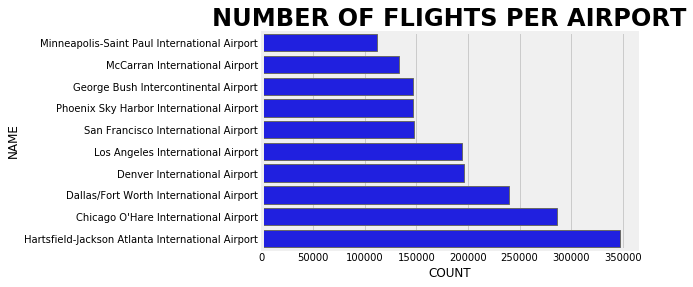

In [10]:
y = sorted_airport_count['NAME']
x = sorted_airport_count['COUNT']

plt.tight_layout()

sns.barplot(x, y, color='b')

plt.xticks(rotation=0) 
plt.title('NUMBER OF FLIGHTS PER AIRPORT', size=24, weight='bold')

In [12]:
flight['Comb_Names'] = flight['ORIGIN_AIRPORT'] + flight['DESTINATION_AIRPORT']

In [13]:
merge1=pd.merge(flight,airports[['LATITUDE','LONGITUDE']], left_on=flight['ORIGIN_AIRPORT'], right_on=airports['IATA_CODE'], how='inner')

merge2=pd.merge(flight,airports[['LATITUDE','LONGITUDE']], left_on=flight['DESTINATION_AIRPORT'], right_on=airports['IATA_CODE'], how='inner')

In [14]:
# merge1[['Comb_Names','LATITUDE','LONGITUDE']]

list1= merge1.Comb_Names.unique().tolist()

list2= merge2.Comb_Names.unique().tolist()

In [15]:
lat1=[]
lon1=[]

for i in range(len(list1[:100])):
    
    lat1.append(merge1[merge1.Comb_Names == list1[i]].reset_index().LATITUDE[0])
    lon1.append(merge1[merge1.Comb_Names == list1[i]].reset_index().LONGITUDE[0])

lat2=[]
lon2=[]

for i in range(len(list1[:100])):
    
    lat2.append(merge2[merge2.Comb_Names == list1[i]].reset_index().LATITUDE[0])
    lon2.append(merge2[merge2.Comb_Names == list1[i]].reset_index().LONGITUDE[0])

<Figure size 2400x1600 with 0 Axes>

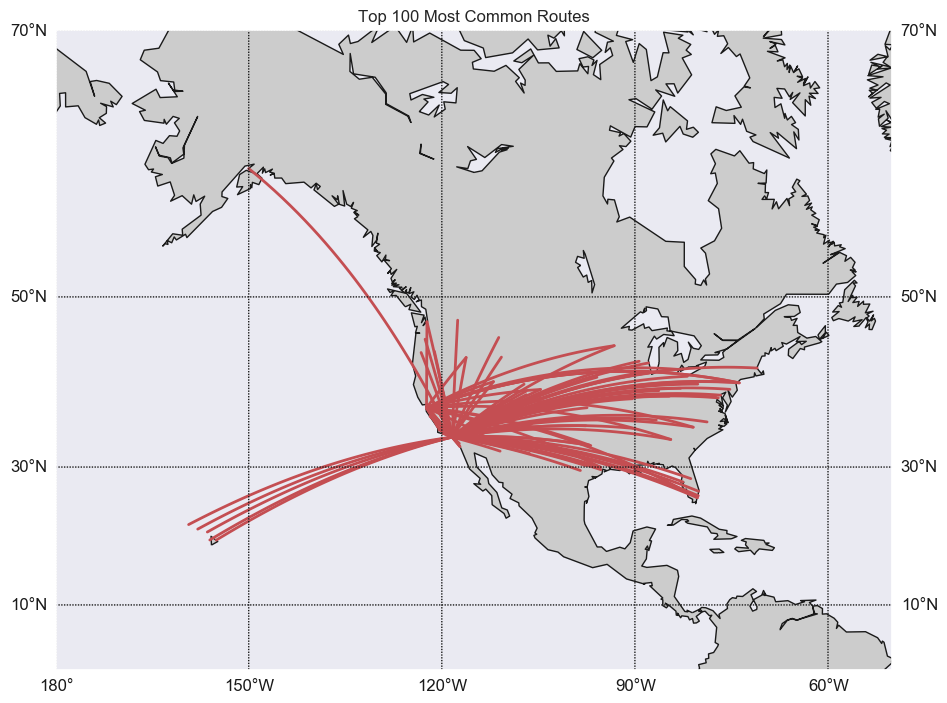

In [267]:
sns.set(rc={'figure.figsize':(12,8)})
fig = plt.figure(num=None, figsize=(24, 16) )
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=0,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=-50,resolution='c')

for i in range(100):
    nylat = lat1[i]; nylon = lon1[i];
    # lonlat, lonlon are lat/lon of London.
    lonlat = lat2[i]; lonlon =lon2[i];
    m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r')
    # draw great circle route between NY and London  

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Top 100 Most Common Routes')
plt.show()

In [16]:
flight[['DATE','AIRLINE','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE']].head()

,DATE,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE
0,2015-01-01 00:00:00,AA,LAX,2015-01-01 00:10:00,2015-01-01 00:02:00
1,2015-01-01 00:00:00,AA,LAX,2015-01-01 00:20:00,2015-01-01 00:15:00
2,2015-01-01 00:00:00,US,LAX,2015-01-01 00:30:00,2015-01-01 00:44:00
3,2015-01-01 00:00:00,DL,LAX,2015-01-01 00:35:00,2015-01-01 00:35:00
4,2015-01-01 00:00:00,AA,LAX,2015-01-01 01:05:00,2015-01-01 01:03:00


Text(0.5, 1.0, 'MEAN TIMEZONE DIFFERENCES')

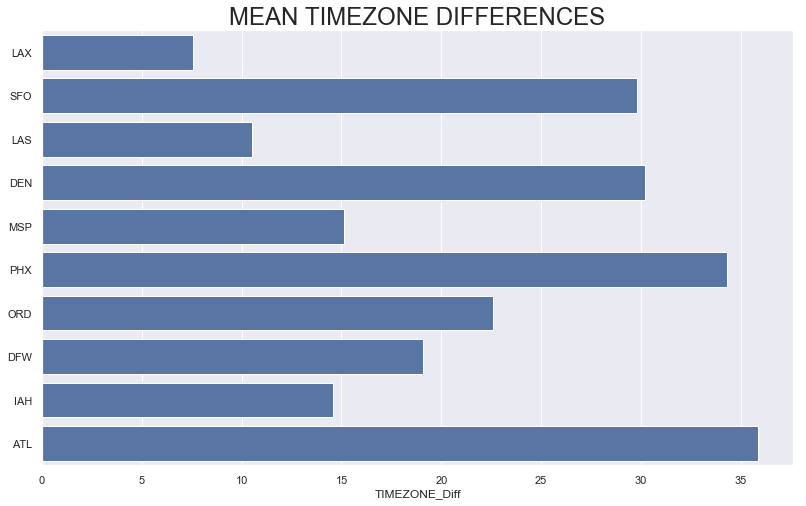

In [17]:
sns.set(rc={'figure.figsize':(12,8)})

time = flight['TIMEZONE_Diff'].groupby(flight['ORIGIN_AIRPORT']).mean()/-60

aa = flight['ORIGIN_AIRPORT'].unique()

g = sns.barplot(time, aa, color='b')

plt.title('MEAN TIMEZONE DIFFERENCES', size=24, weight=18)

In [18]:
flight['airlane_names'] = flight['AIRLINE']

In [19]:
airport_names = pd.read_csv('flight_data/airports.csv')

In [20]:
airline_names = pd.read_csv('flight_data/airlines.csv')
airline_names.index = airline_names['IATA_CODE']
air = airline_names['AIRLINE'].to_dict()

In [21]:
flight['airlane_names'] = flight['airlane_names'].replace(air)

In [22]:
sizes = flight[['AIRLINE','airlane_names','ORIGIN_AIRPORT']]

In [23]:
sizes = flight[['AIRLINE']].groupby([flight['AIRLINE'], flight['airlane_names']]).count()
sizes.columns = ['NUMBER_OF_FLIGHTS']
sizes.reset_index(level=['AIRLINE','airlane_names'], inplace=True)

In [24]:
sizes = sizes.sort_values(by='NUMBER_OF_FLIGHTS', ascending=True)

In [25]:
sizes['NAMES'] = sizes['AIRLINE']
sizes['NAMES'] = sizes['NAMES'].replace(air)

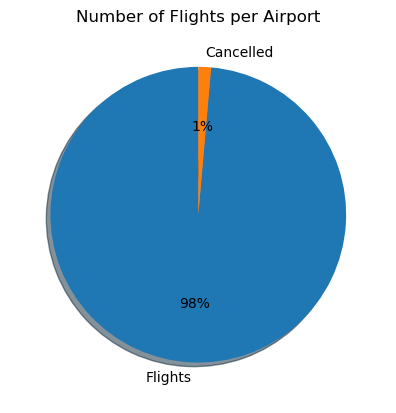

In [26]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 3.0  

#total_shceheduled = flight[['DEPARTURE']]

successfully_departed = flight[['DEPARTURE']].isnull()
#total_shceheduled
pie_ch =successfully_departed['DEPARTURE'].groupby(successfully_departed['DEPARTURE'])

plt.tight_layout(w_pad=3) 
plt.pie(pie_ch.count(), labels=['Flights','Cancelled'], autopct='%.1d%%', shadow=True, startangle=90)
plt.title('Number of Flights per Airport')  
plt.show()

#{:.1f}%\n({:d} g)".format(pct, absolute)

In [27]:
notnu = flight['AIRLINE'][flight['DEPARTURE'].notnull()].groupby(flight['AIRLINE']).count()
canc = flight['AIRLINE'][flight['DEPARTURE'].isnull()].groupby(flight['AIRLINE']).count()
notnu.index

Index(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN'],
      dtype='object', name='AIRLINE')

No handles with labels found to put in legend.


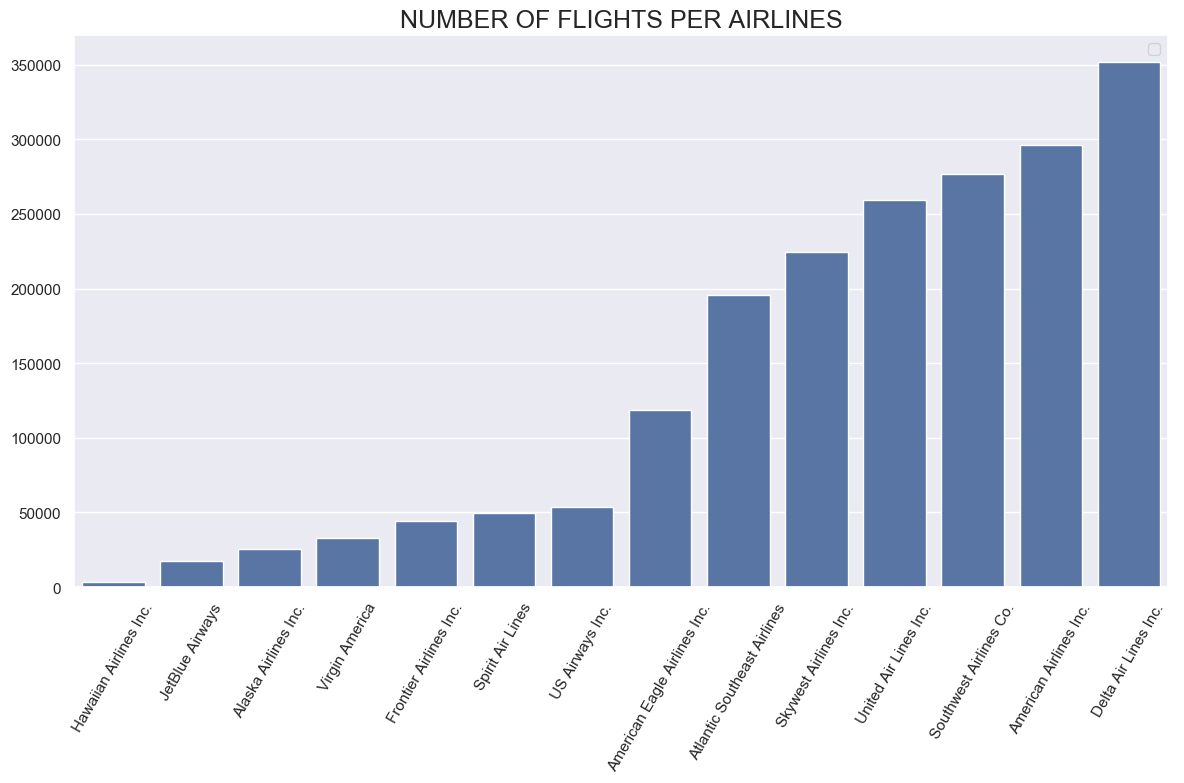

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(sizes.airlane_names.tolist(), y=sizes.NUMBER_OF_FLIGHTS.tolist(),color='b')
plt.title('NUMBER OF FLIGHTS PER AIRLINES',fontsize=18)
plt.legend(ncol=4, loc="out", frameon=True)
plt.xticks(rotation=60) 

plt.tight_layout() 
plt.show()


                         AIRLINE  bars2   bars1
6         Hawaiian Airlines Inc.      5    3363
2                JetBlue Airways    194   17381
1           Alaska Airlines Inc.     77   25601
12                Virgin America    202   32685
5         Frontier Airlines Inc.    167   43968
8               Spirit Air Lines    886   48596
11               US Airways Inc.    509   52952
7   American Eagle Airlines Inc.   5416  113010
4    Atlantic Southeast Airlines   3908  192091
9          Skywest Airlines Inc.   3822  220582
10         United Air Lines Inc.   3038  256459
13        Southwest Airlines Co.   2952  273633
0         American Airlines Inc.   4668  291463
3           Delta Air Lines Inc.   1177  350937


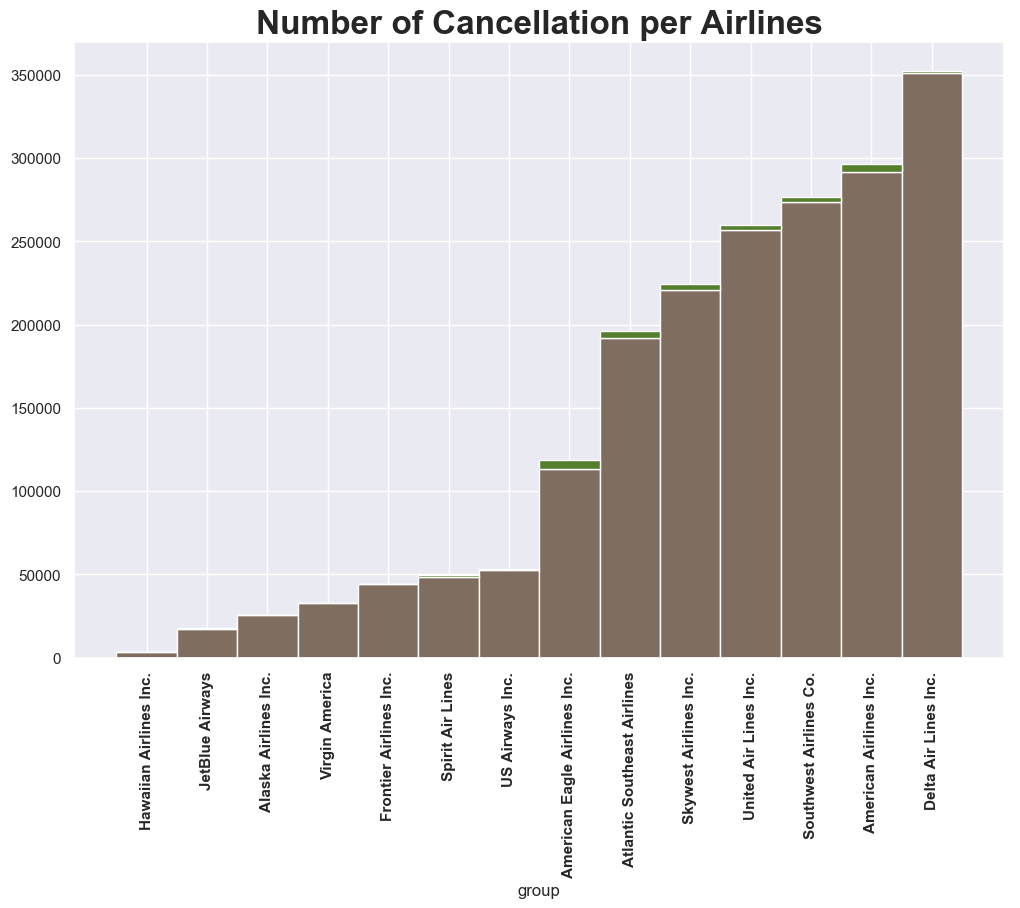

In [29]:
 # Values of each group
bars1 = flight['AIRLINE'][flight['DEPARTURE'].notnull()].groupby(flight['AIRLINE']).count()
bars2 = flight['AIRLINE'][flight['DEPARTURE'].isnull()].groupby(flight['AIRLINE']).count()

temp = pd.DataFrame()
temp['bars2'] = bars2
temp['bars1'] = bars1
temp.reset_index(inplace=True)
temp['AIRLINE'] = temp['AIRLINE'].replace(air)
temp = temp.sort_values(by='bars1')
print(temp)

# Heights of bars1 + bars2
# bars = np.add(temp.bars1, temp.bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(len(bars1))
 
# Names of group and bar width
names = temp['AIRLINE'].tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, temp.bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, temp.bars2, bottom=temp.bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xticks(rotation=90) 
plt.xlabel("group")
plt.title('Number of Cancellation per Airlines',size=24, weight='bold')
 
# Show graphic
plt.show()

In [30]:
sizes

,AIRLINE,airlane_names,NUMBER_OF_FLIGHTS,NAMES
6,HA,Hawaiian Airlines Inc.,3368,Hawaiian Airlines Inc.
2,B6,JetBlue Airways,17575,JetBlue Airways
1,AS,Alaska Airlines Inc.,25678,Alaska Airlines Inc.
12,VX,Virgin America,32887,Virgin America
5,F9,Frontier Airlines Inc.,44135,Frontier Airlines Inc.
8,NK,Spirit Air Lines,49482,Spirit Air Lines
11,US,US Airways Inc.,53461,US Airways Inc.
7,MQ,American Eagle Airlines Inc.,118426,American Eagle Airlines Inc.
4,EV,Atlantic Southeast Airlines,195999,Atlantic Southeast Airlines
9,OO,Skywest Airlines Inc.,224404,Skywest Airlines Inc.


In [31]:
list=[]

for i in air.values():
    list.append(i)

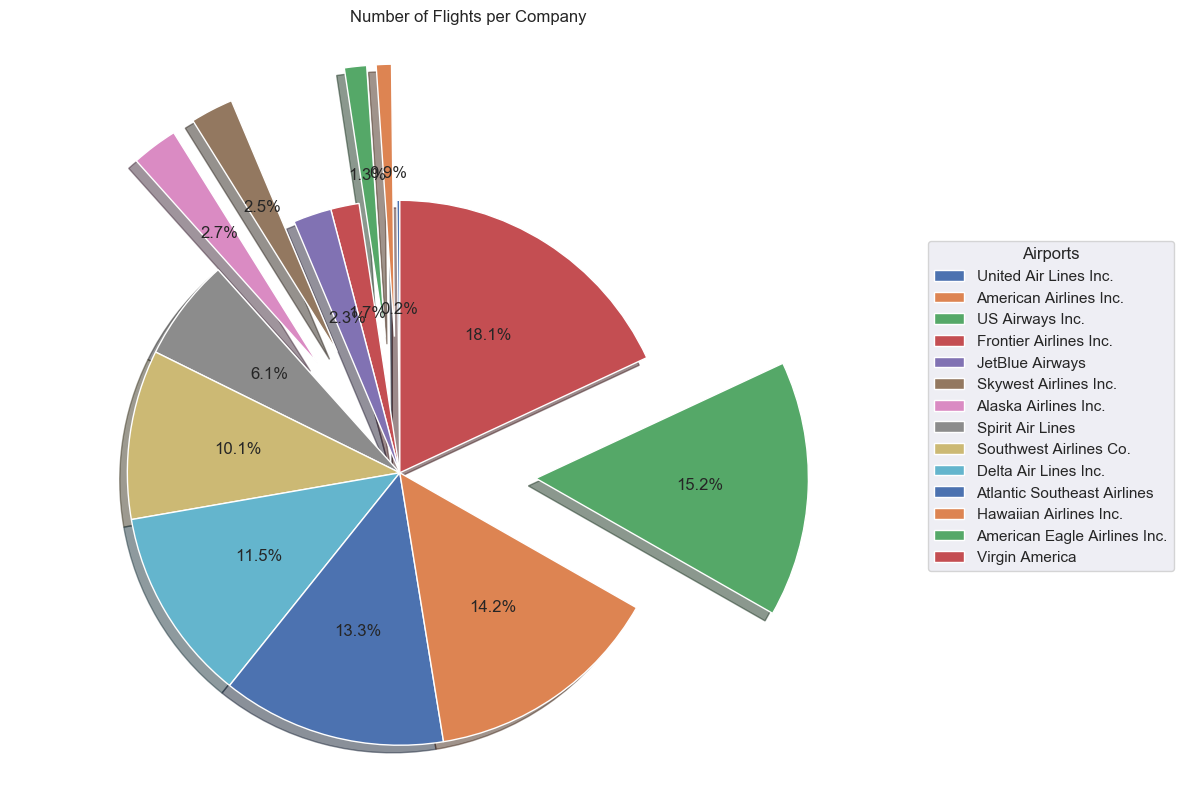

In [32]:
explode = [.5 if sizes['NUMBER_OF_FLIGHTS'][i] < 45000 else 0.0 for i in range(len(sizes))] # explode 1st slice
wedges, texts, autotexts = plt.pie(sizes['NUMBER_OF_FLIGHTS'], explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend(wedges, list, title="Airports", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.axis('equal')
plt.tight_layout(w_pad=3) 
plt.title('Number of Flights per Company')
plt.show()

In [33]:
flight['Airline_Names'] = flight['AIRLINE']
flight['Airline_Names'] = flight['Airline_Names'].replace(air)

Airline_Names
Alaska Airlines Inc.             2.679153
American Airlines Inc.          10.285748
American Eagle Airlines Inc.    10.982612
Atlantic Southeast Airlines      9.126529
Delta Air Lines Inc.             7.801349
Frontier Airlines Inc.          13.457378
Hawaiian Airlines Inc.           3.736247
JetBlue Airways                 14.368448
Skywest Airlines Inc.           10.053472
Southwest Airlines Co.          12.653386
Spirit Air Lines                19.520351
US Airways Inc.                  5.367125
United Air Lines Inc.           16.183569
Virgin America                   9.437387
Name: departure_delay, dtype: float64


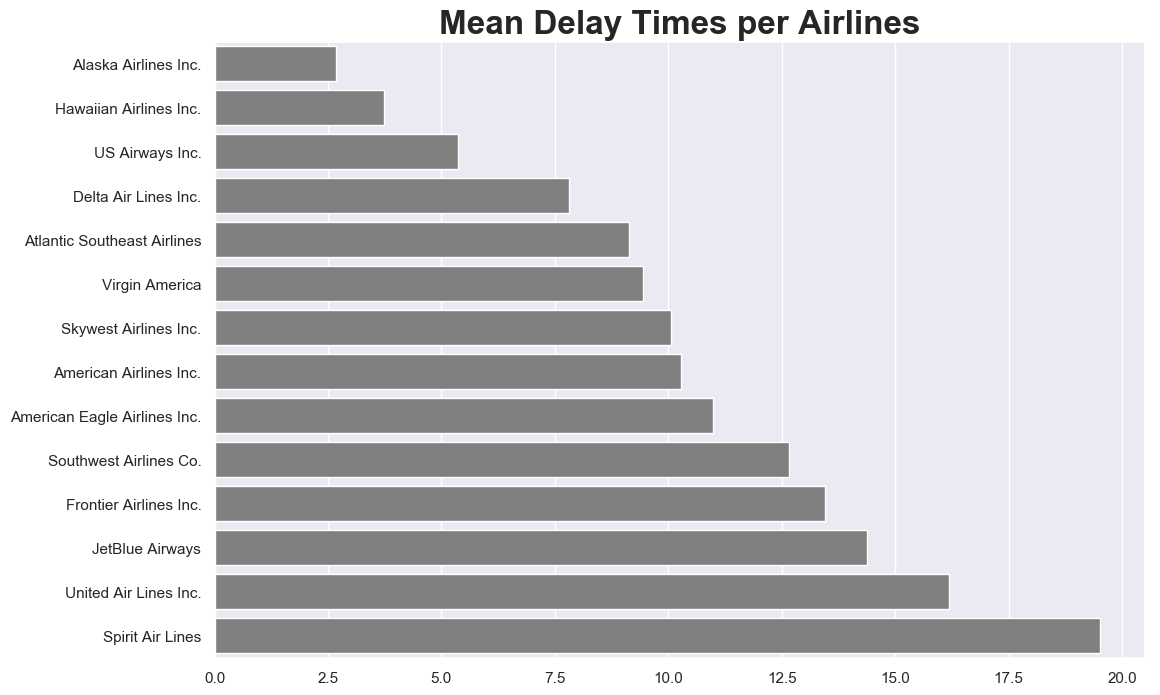

In [34]:
delay =flight['departure_delay'].groupby(flight['Airline_Names']).mean()

print(delay)

delay_=delay.to_dict()

x=sorted(delay_.values())
y=[]

for i in range(len(x)):
    for j in delay_:
        if delay[j] == x[i]:
            y.append(j)

sns.barplot(x, y, color='gray')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Mean Delay Times per Airlines', size=24, weight='bold')
plt.show()

In [ ]:
sns.scatterplot(x=flight['AIRLINE'], y=flight['departure_delay'])

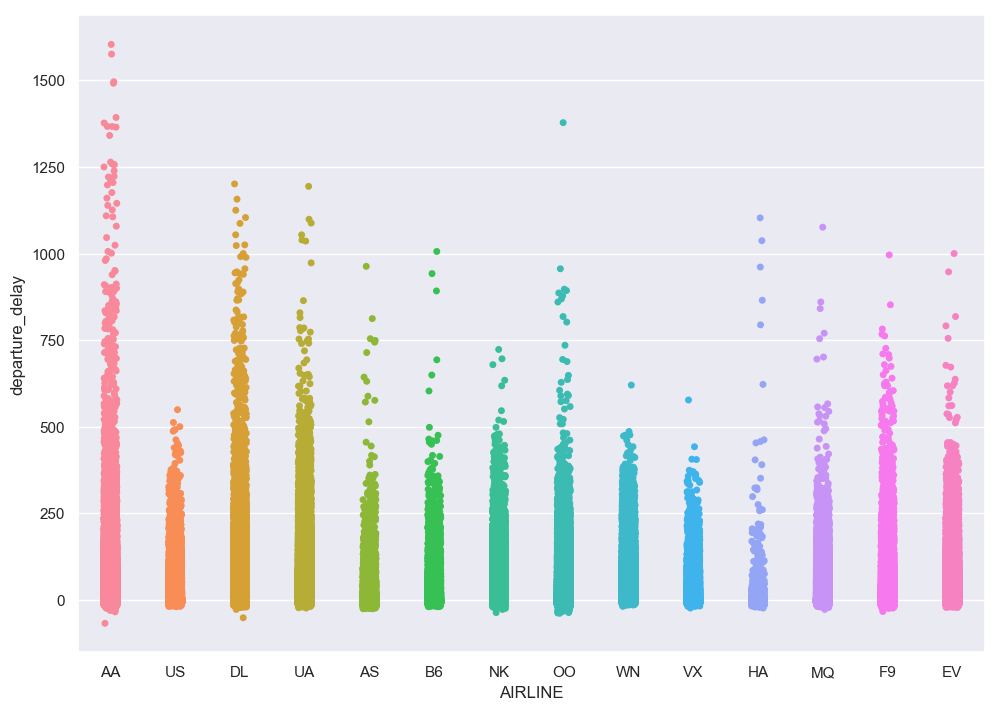

In [35]:
ax = sns.stripplot(x=flight['AIRLINE'], y=flight['departure_delay'])

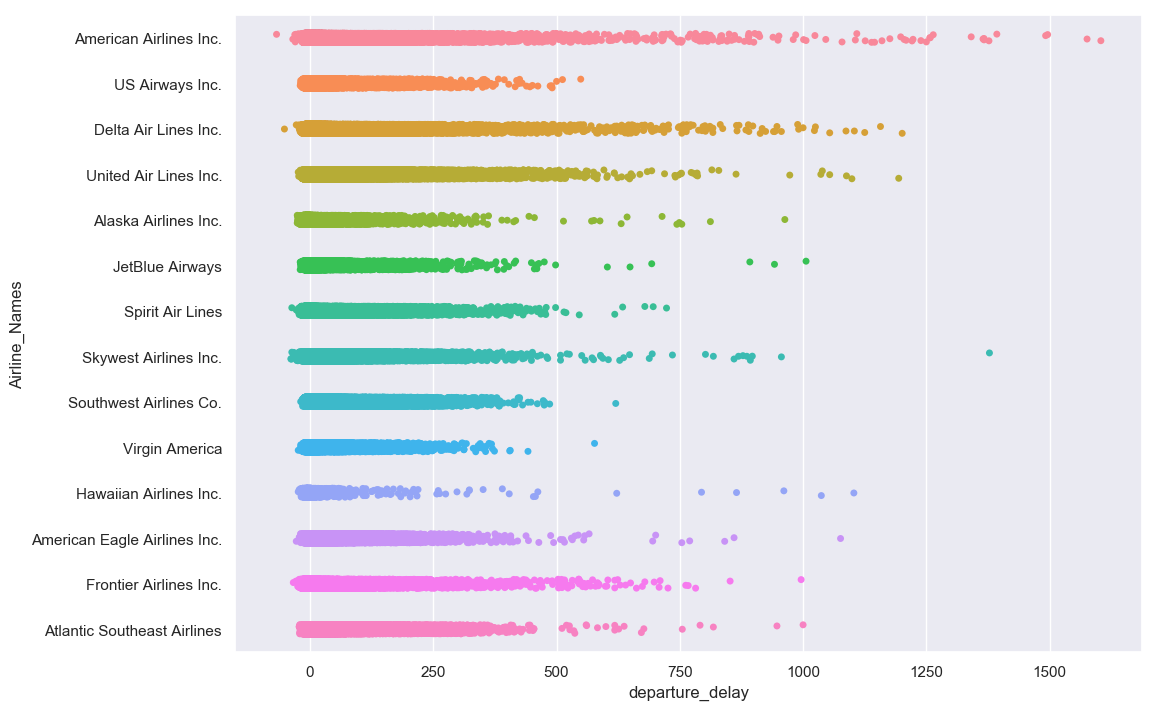

In [36]:
ax = sns.stripplot(x=flight['departure_delay'], y=flight['Airline_Names'], jitter=True)

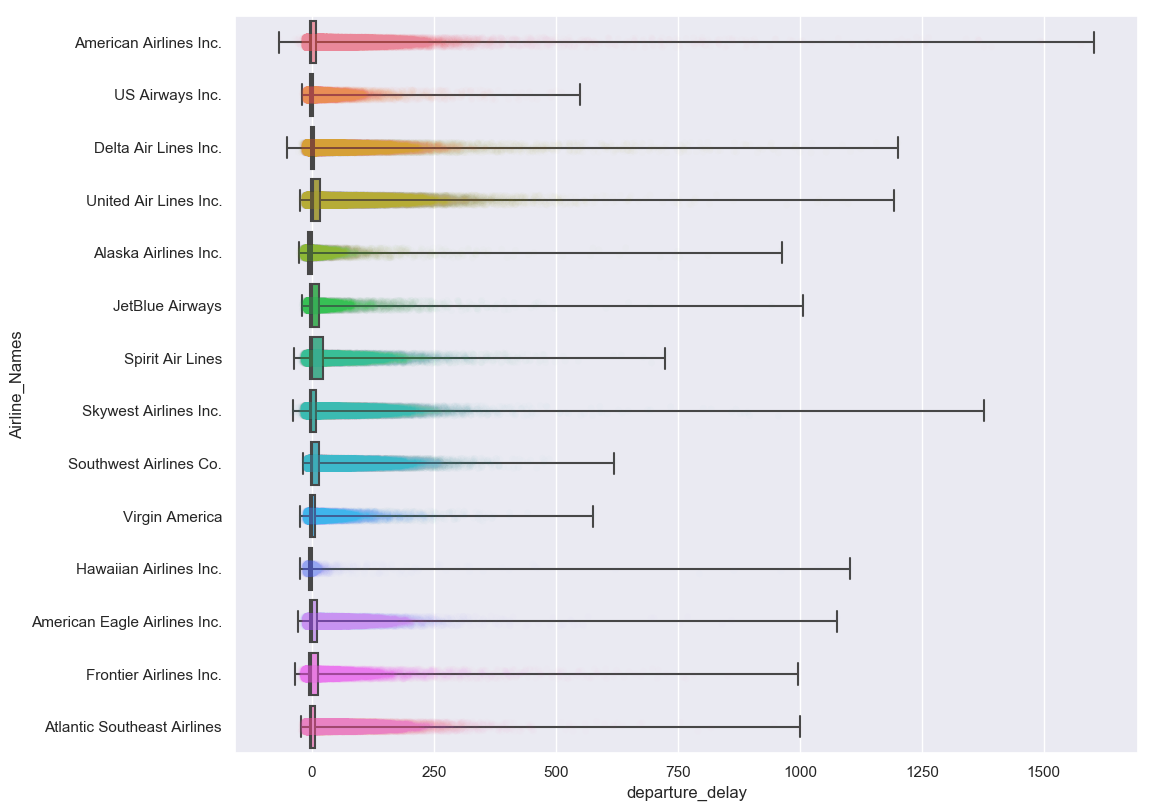

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(x=flight['departure_delay'], y=flight['Airline_Names'], whis=np.inf)
ax = sns.stripplot(x=flight['departure_delay'], y=flight['Airline_Names'], jitter=True, alpha=0.01)

plt.tight_layout()
plt.show()

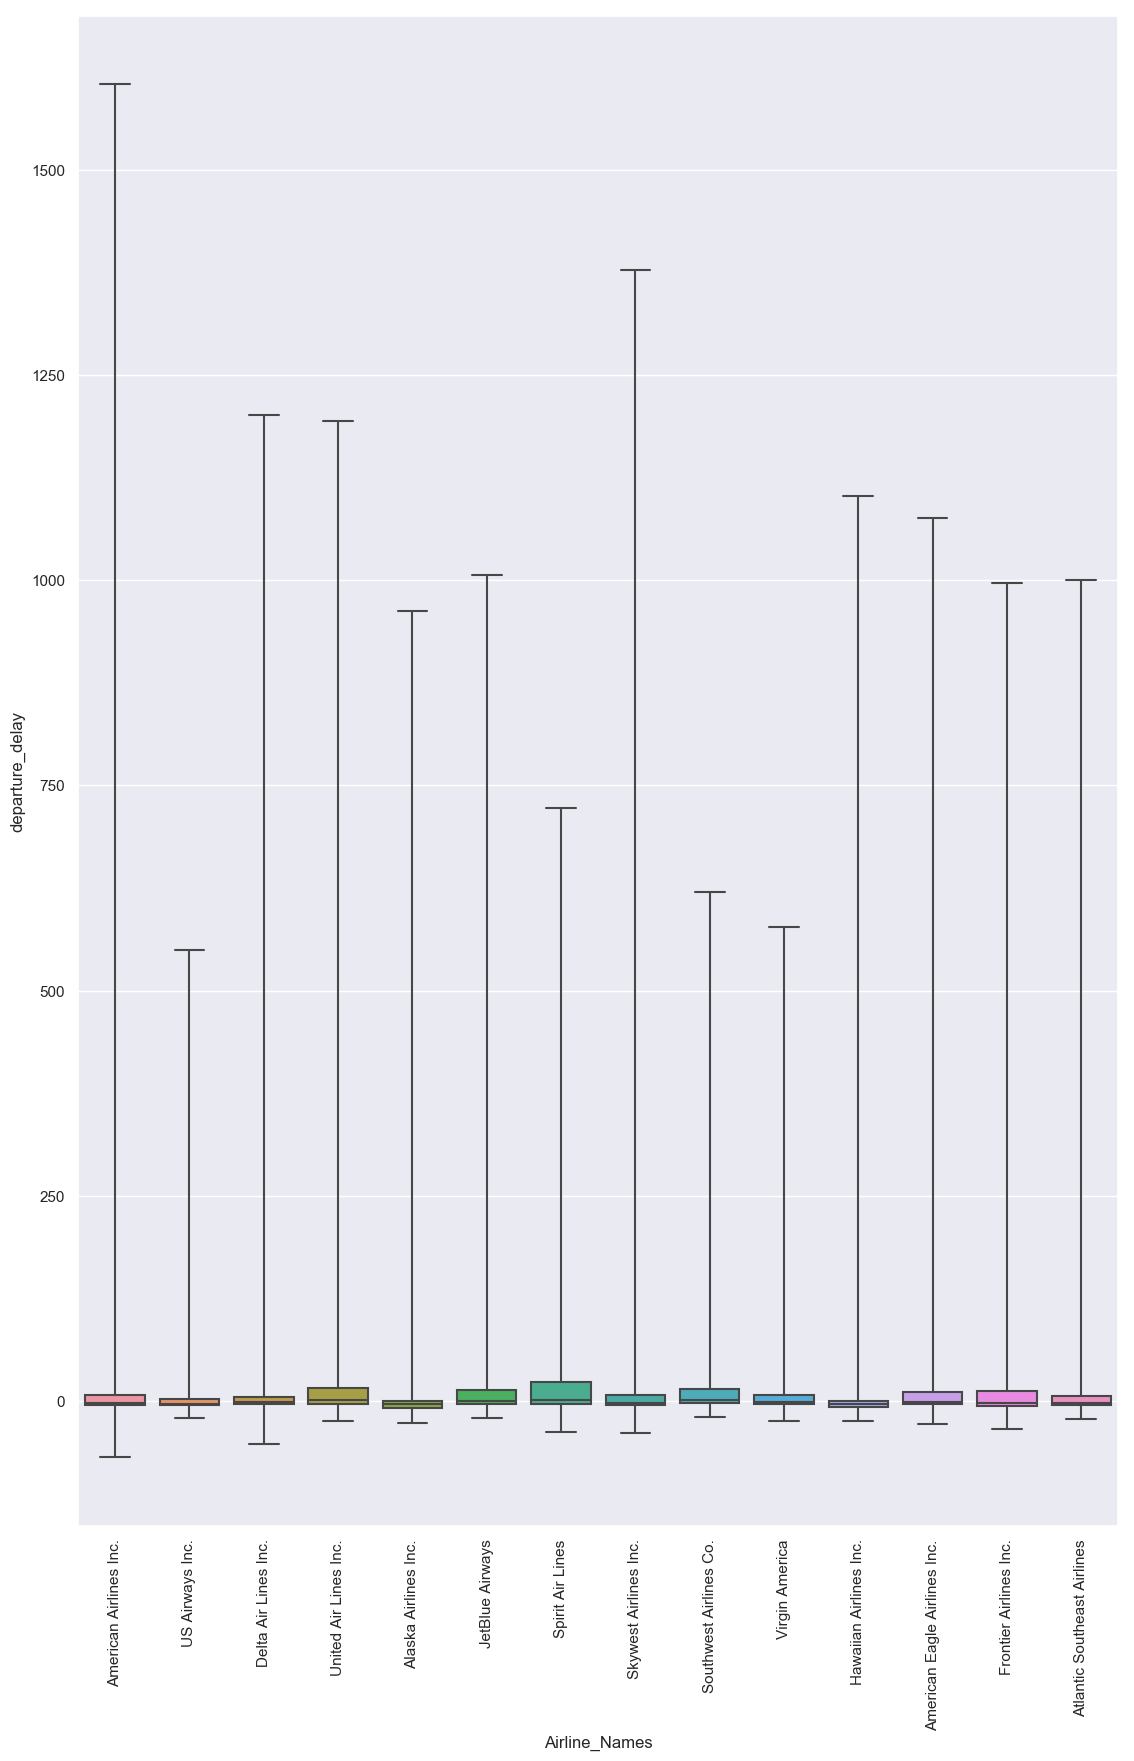

In [38]:
sns.set(rc={'figure.figsize':(12,16)})

ax = sns.boxplot(x=flight['Airline_Names'], y=flight['departure_delay'], whis=np.inf)

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

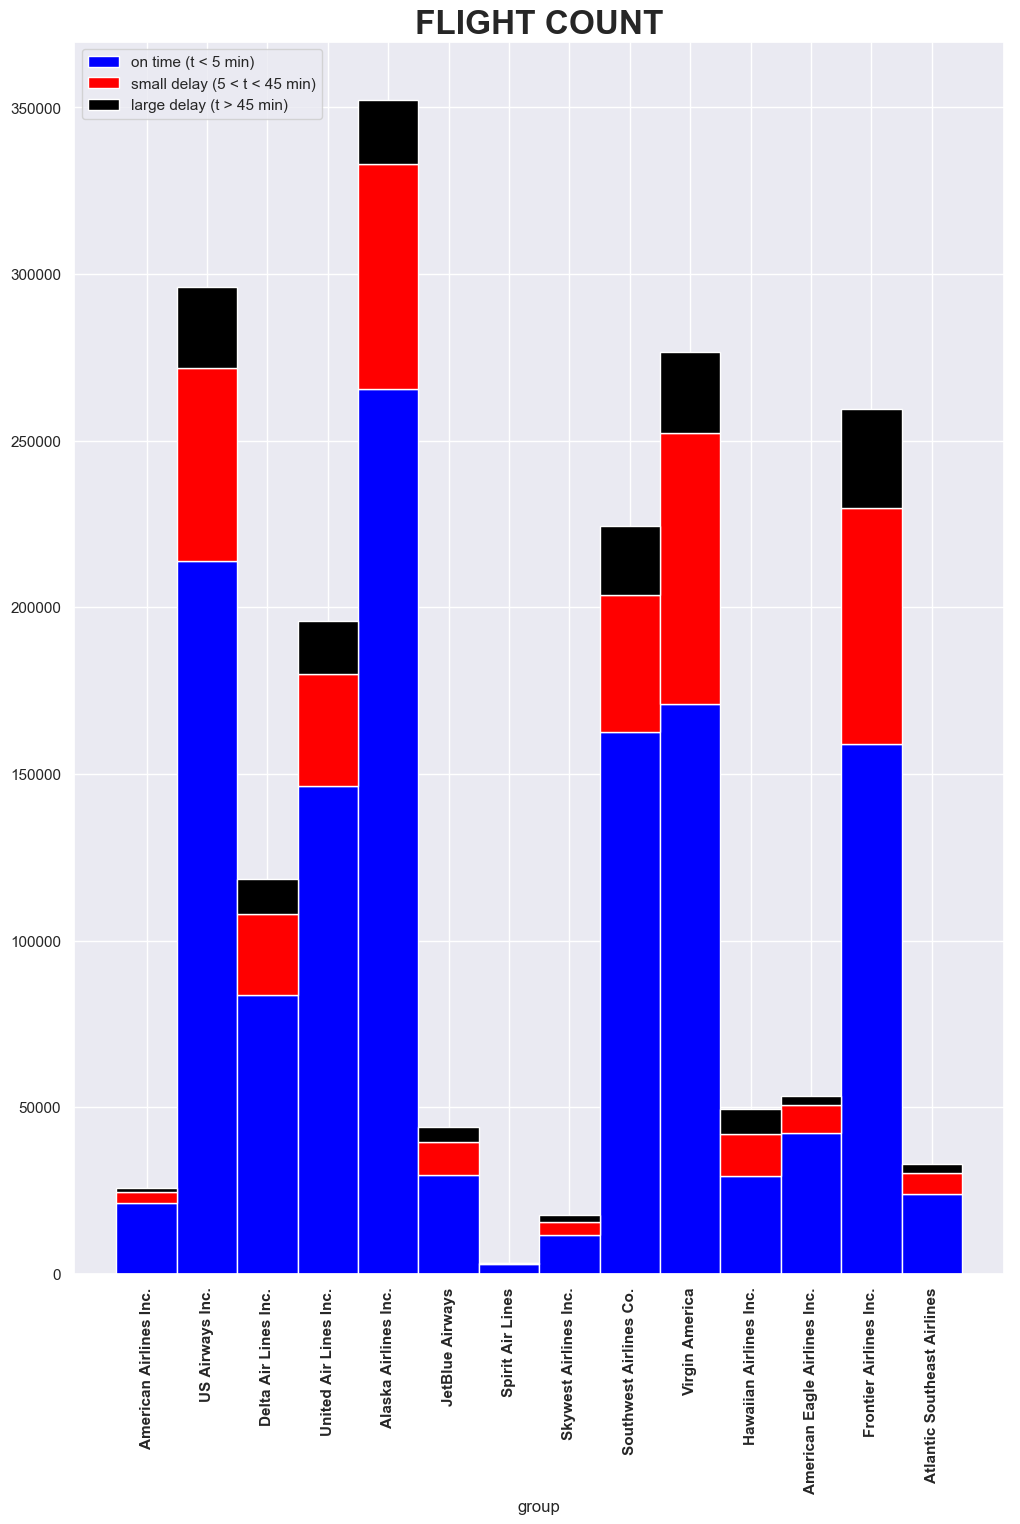

In [39]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]

flight['DELAY_LEVEL'] = flight['departure_delay'].apply(delay_type)

bars1 = flight['DELAY_LEVEL'][flight.DELAY_LEVEL == 0].groupby(flight['Airline_Names']).count().tolist()
bars2 = flight['DELAY_LEVEL'][flight.DELAY_LEVEL == 1].groupby(flight['Airline_Names']).count().tolist()
bars3 = flight['DELAY_LEVEL'][flight.DELAY_LEVEL == 2].groupby(flight['Airline_Names']).count().tolist()

# Heights of bars1 + bars2
bars = np.add(bars1,bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(14)
 
# Names of group and bar width
names = flight['Airline_Names'].unique().tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)

# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth)

# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='black', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.xticks(rotation=90)

plt.legend(['on time (t < 5 min)','small delay (5 < t < 45 min)','large delay (t > 45 min)'], loc=2)
plt.title('FLIGHT COUNT', size=24, weight='bold')

# Show graphic
plt.show()

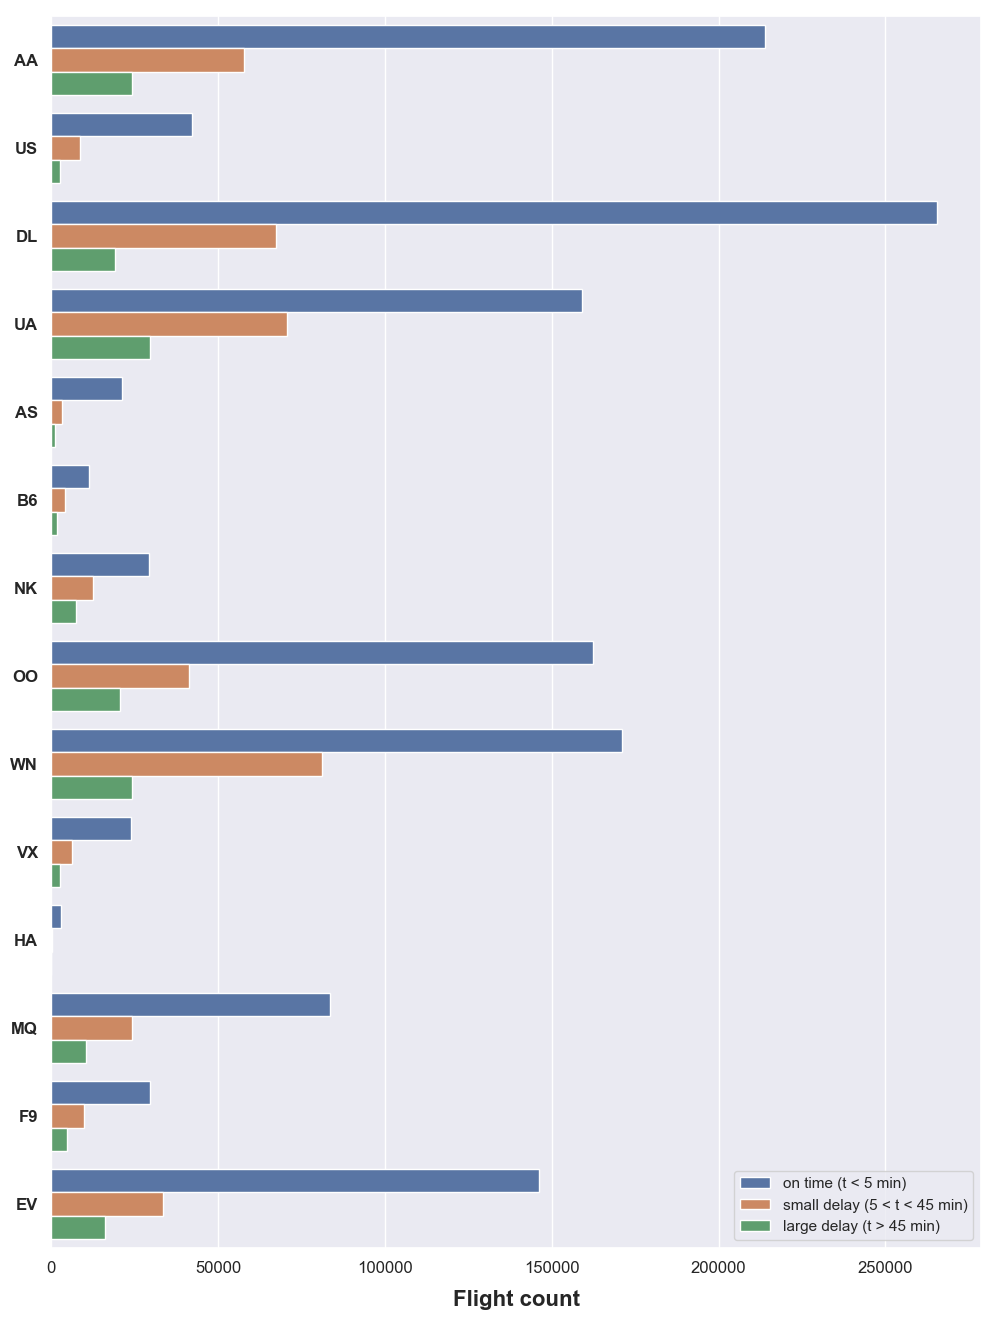

In [40]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]

flight['DELAY_LEVEL'] = flight['departure_delay'].apply(delay_type)

ax = sns.countplot(y='AIRLINE', hue='DELAY_LEVEL', data=flight)

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')

plt.show()
#do stack bar chart 

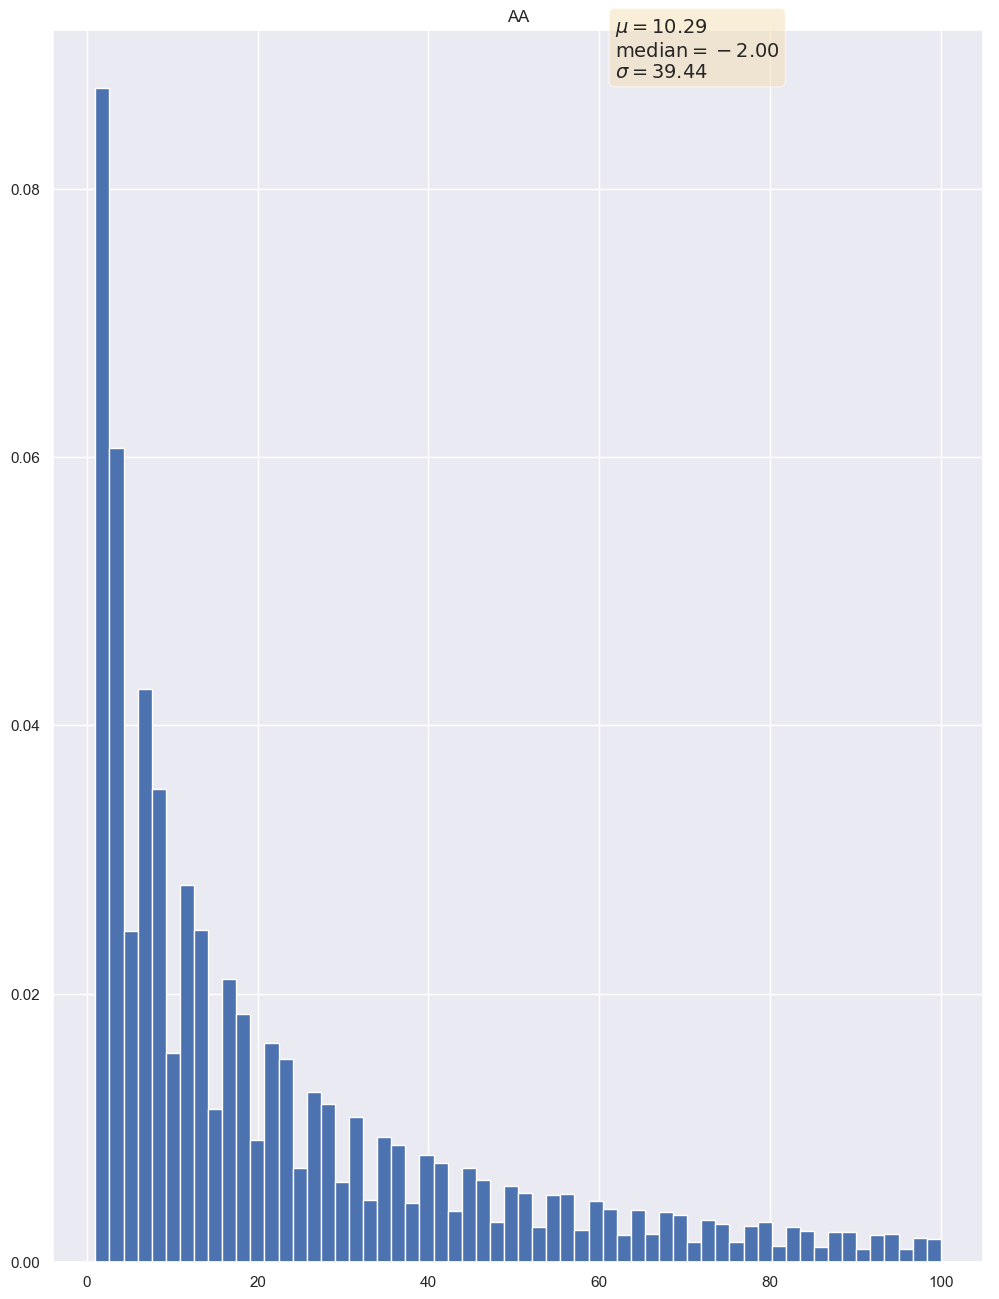

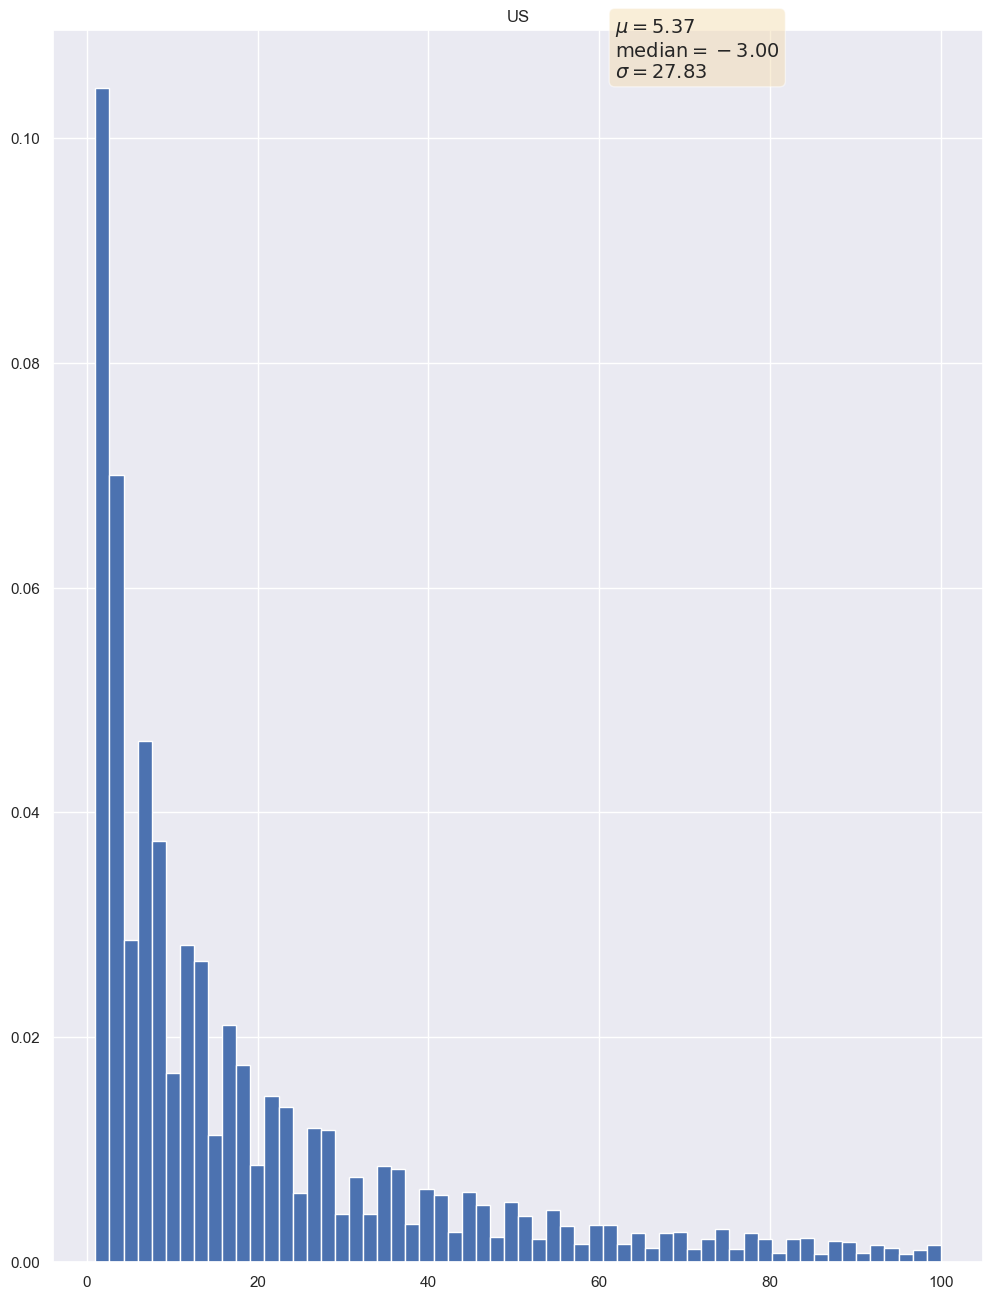

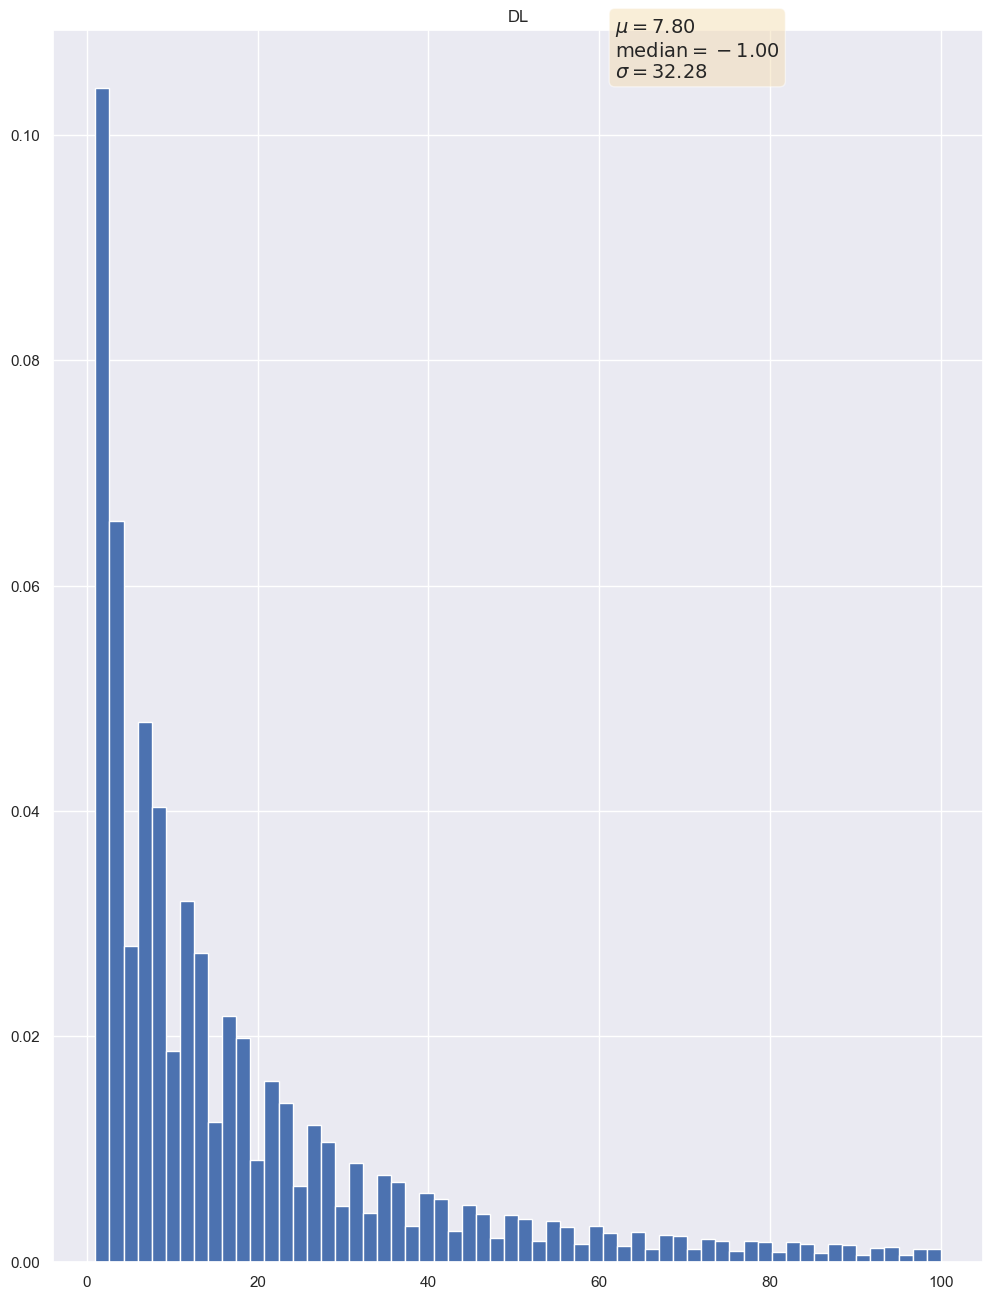

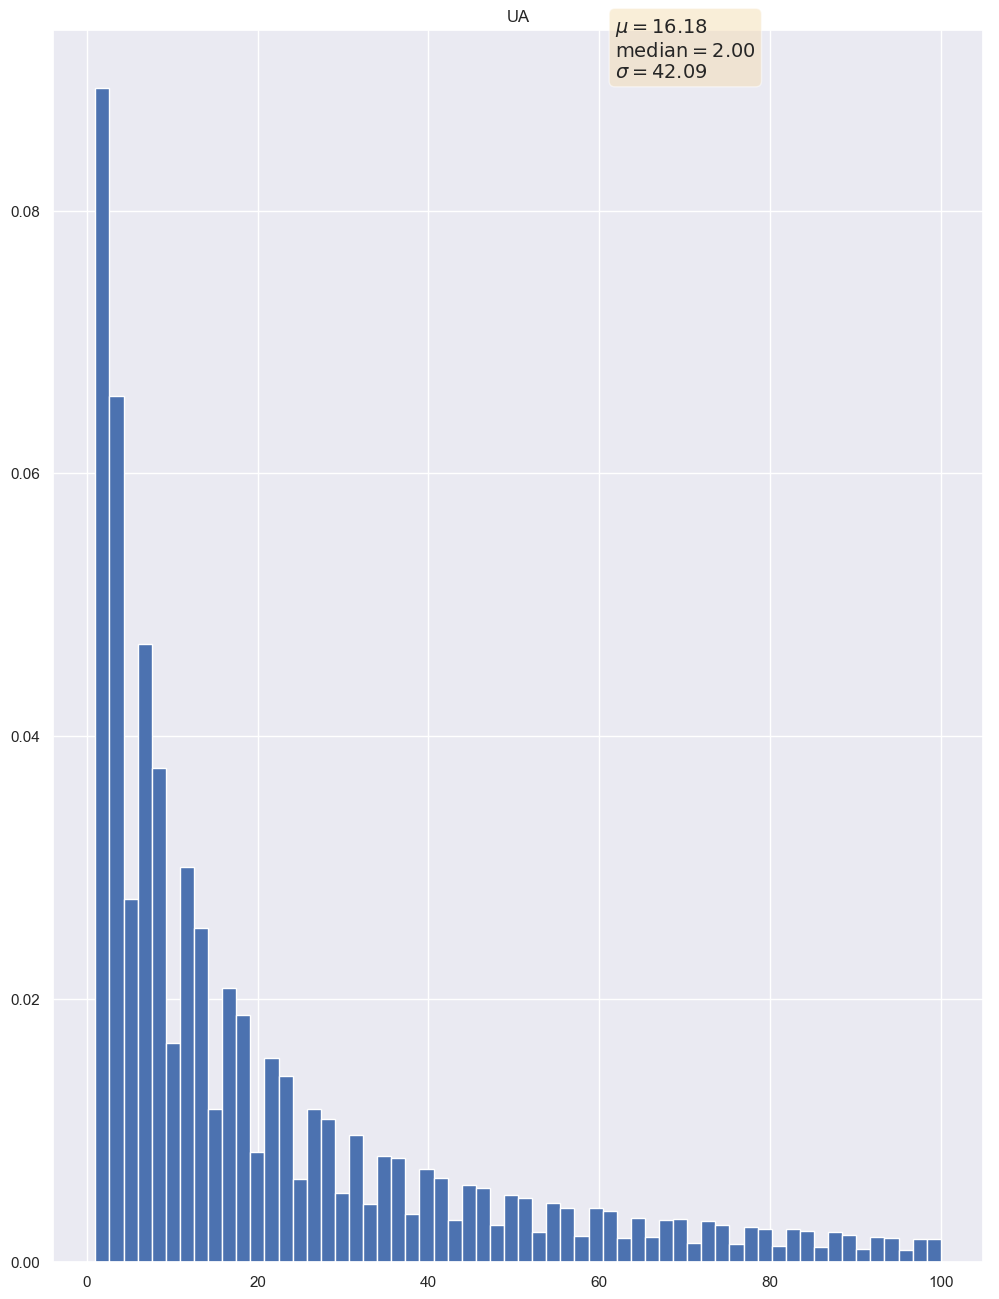

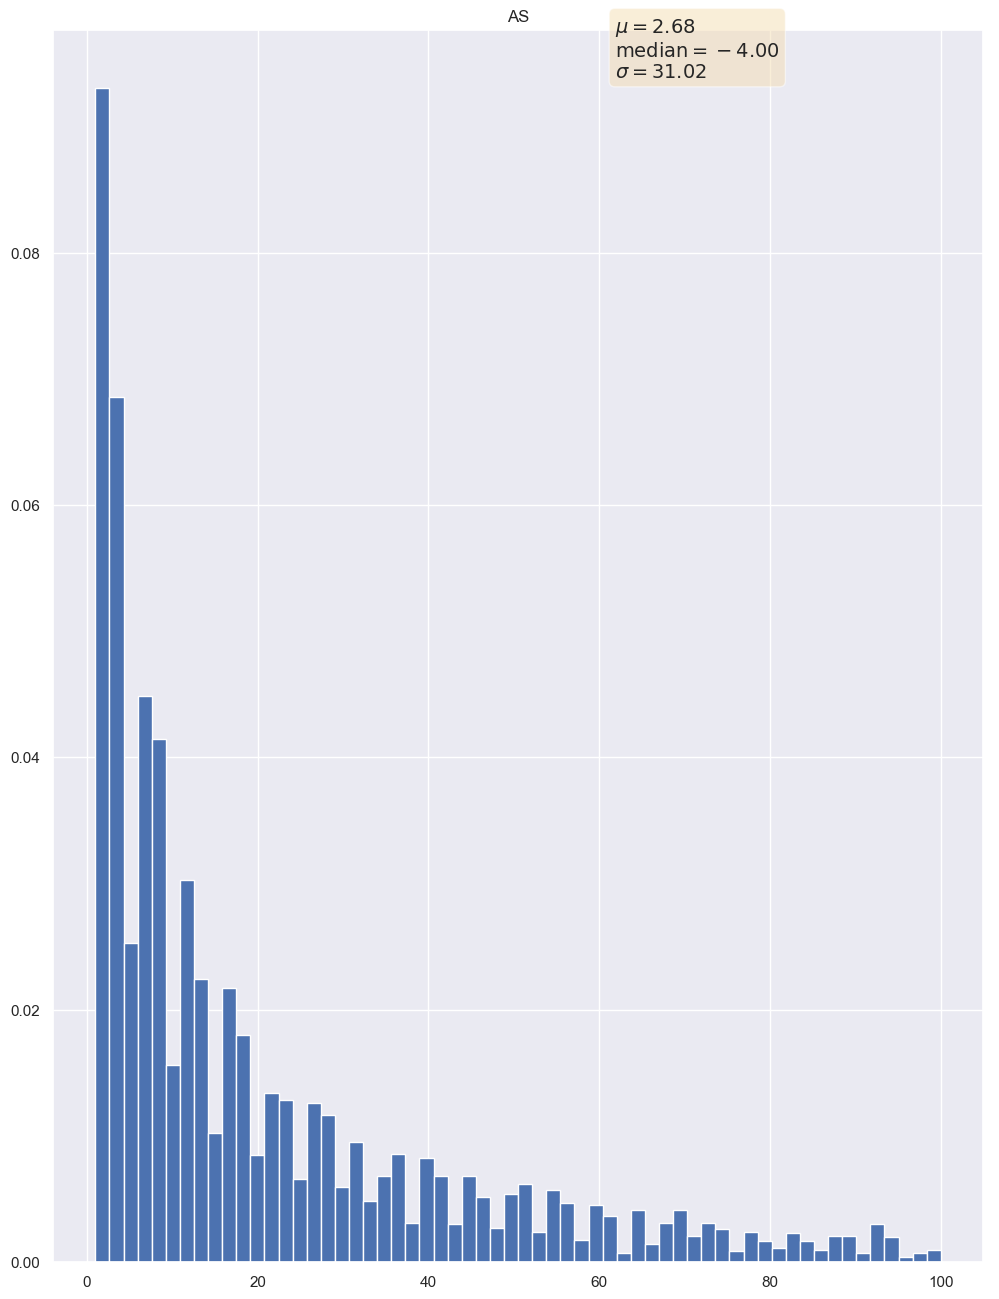

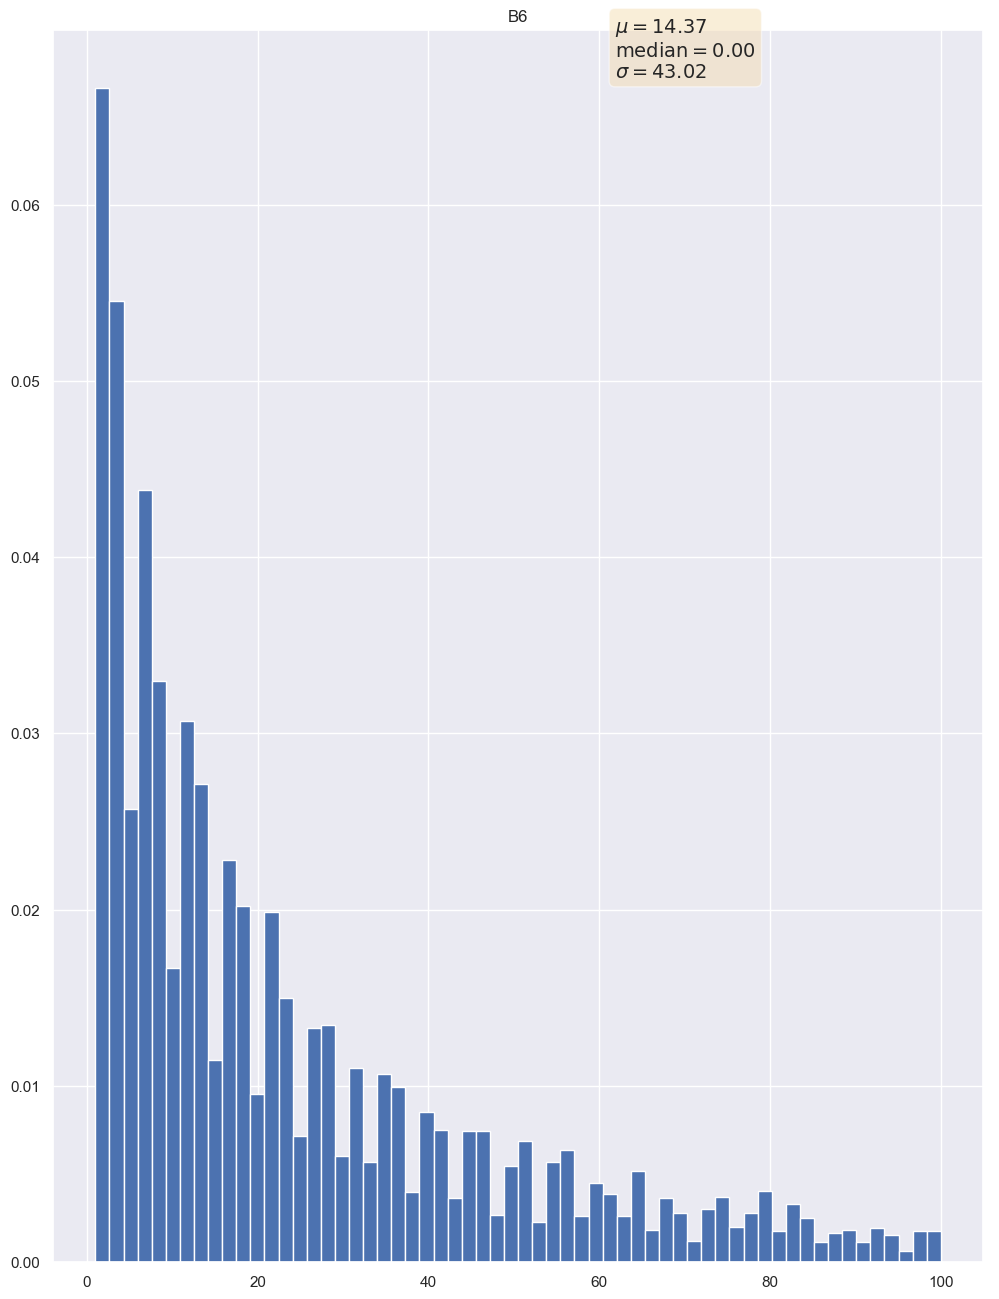

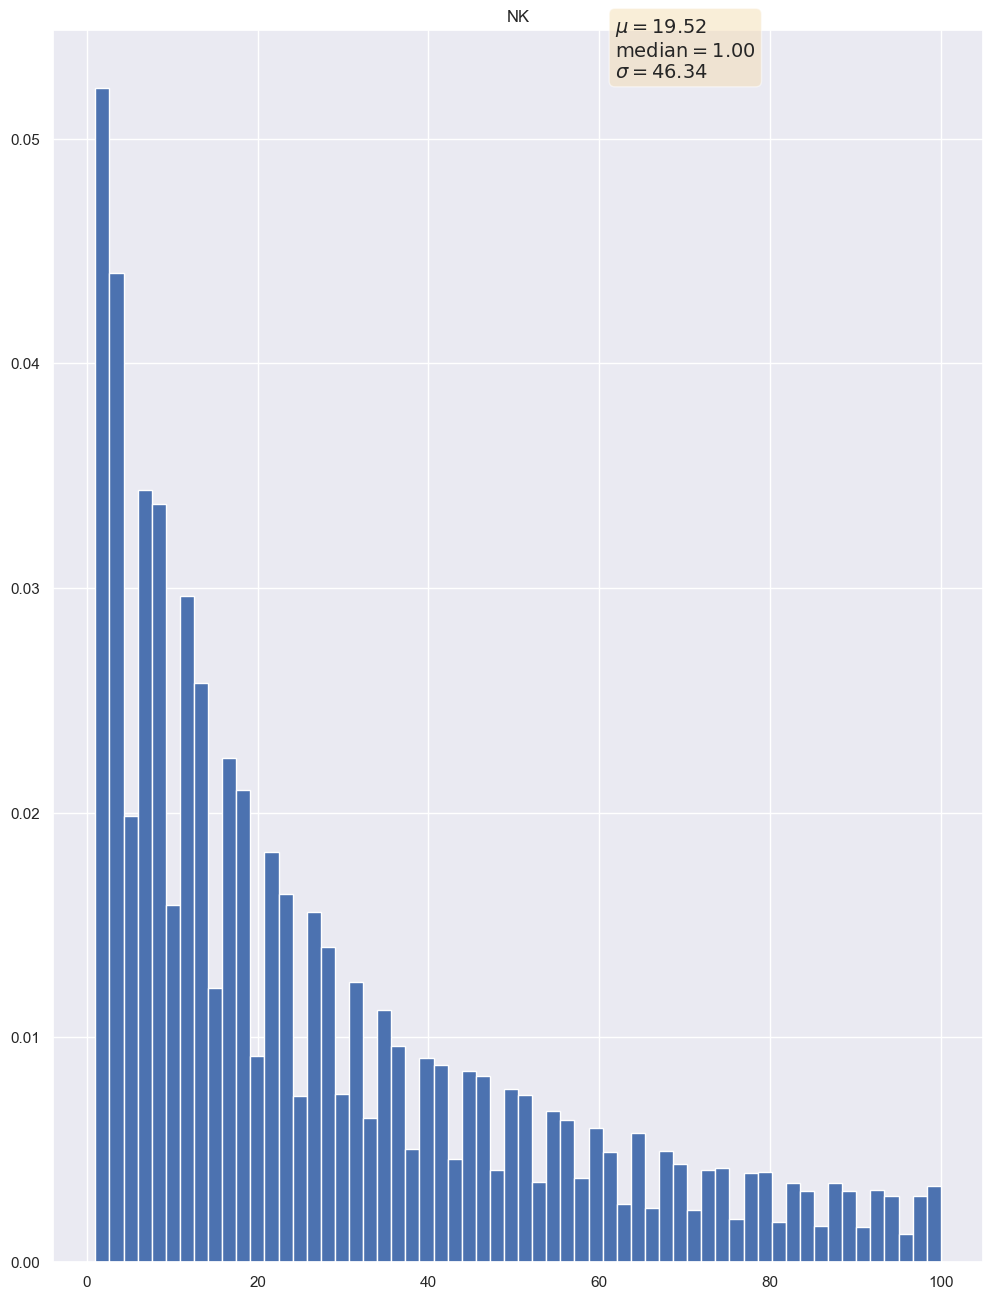

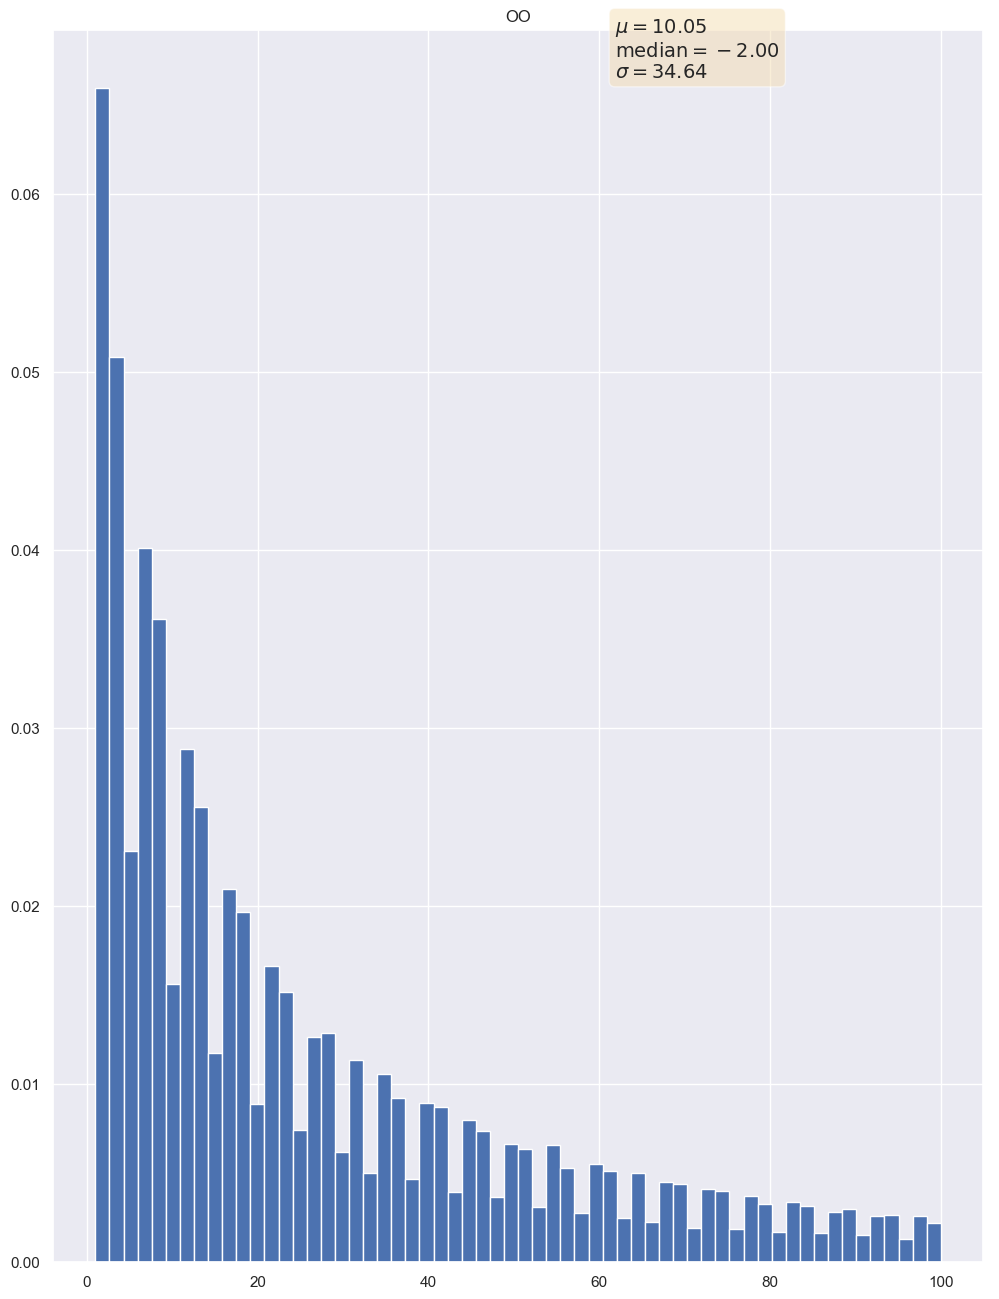

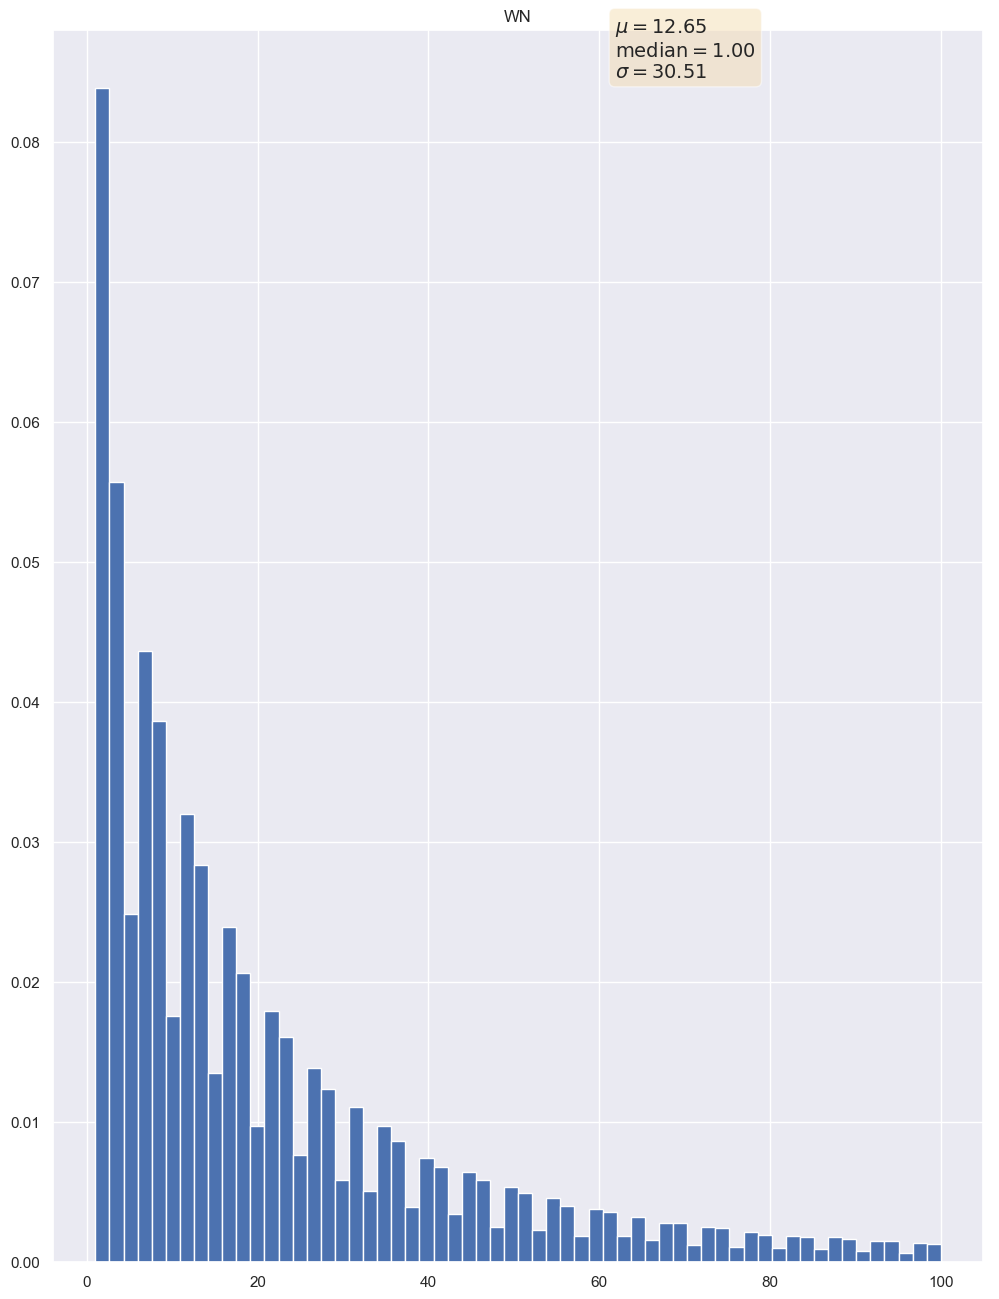

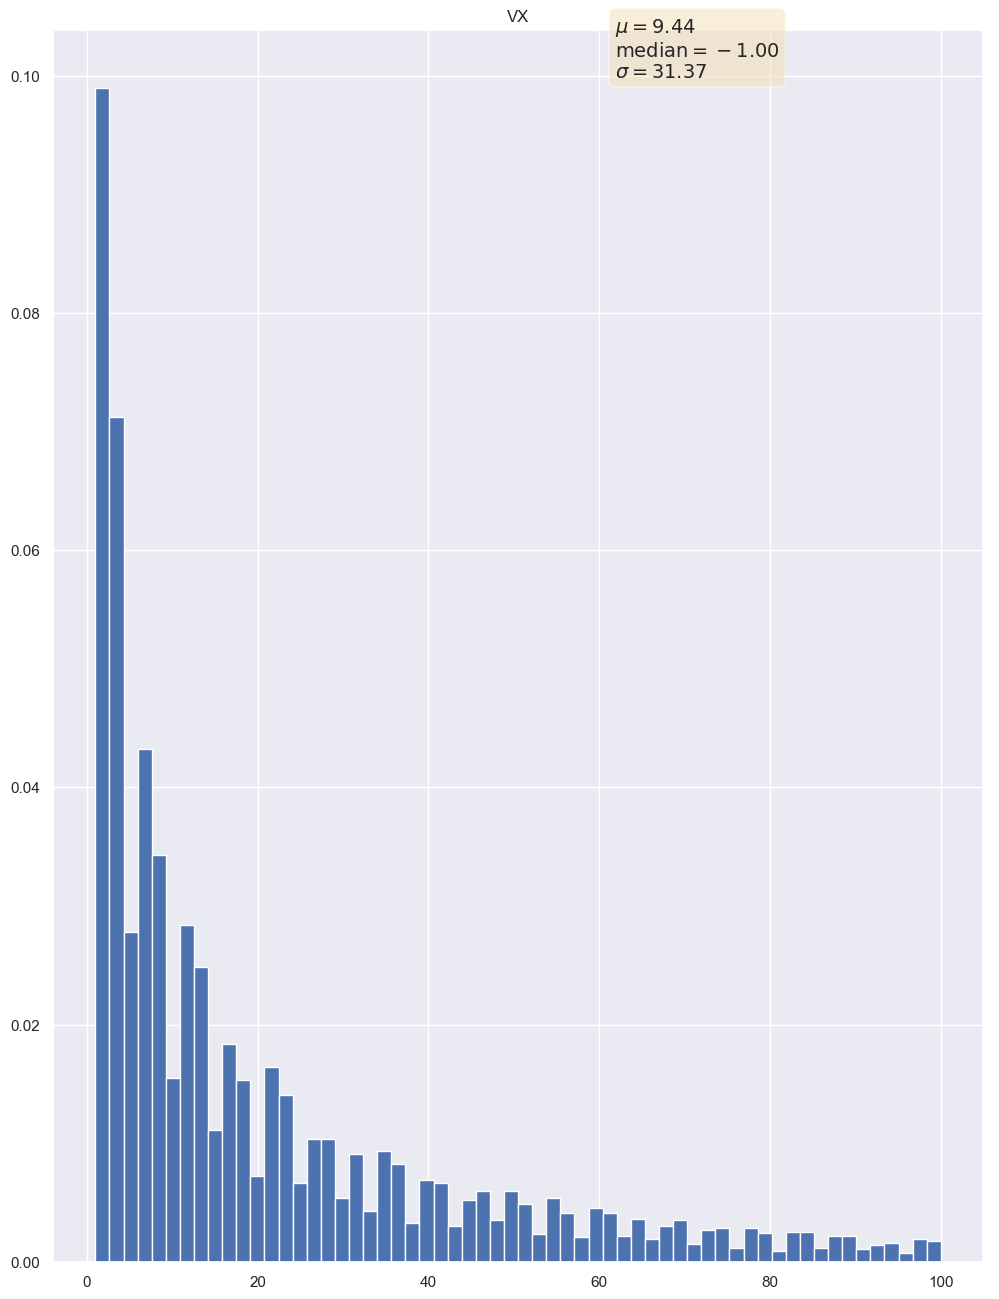

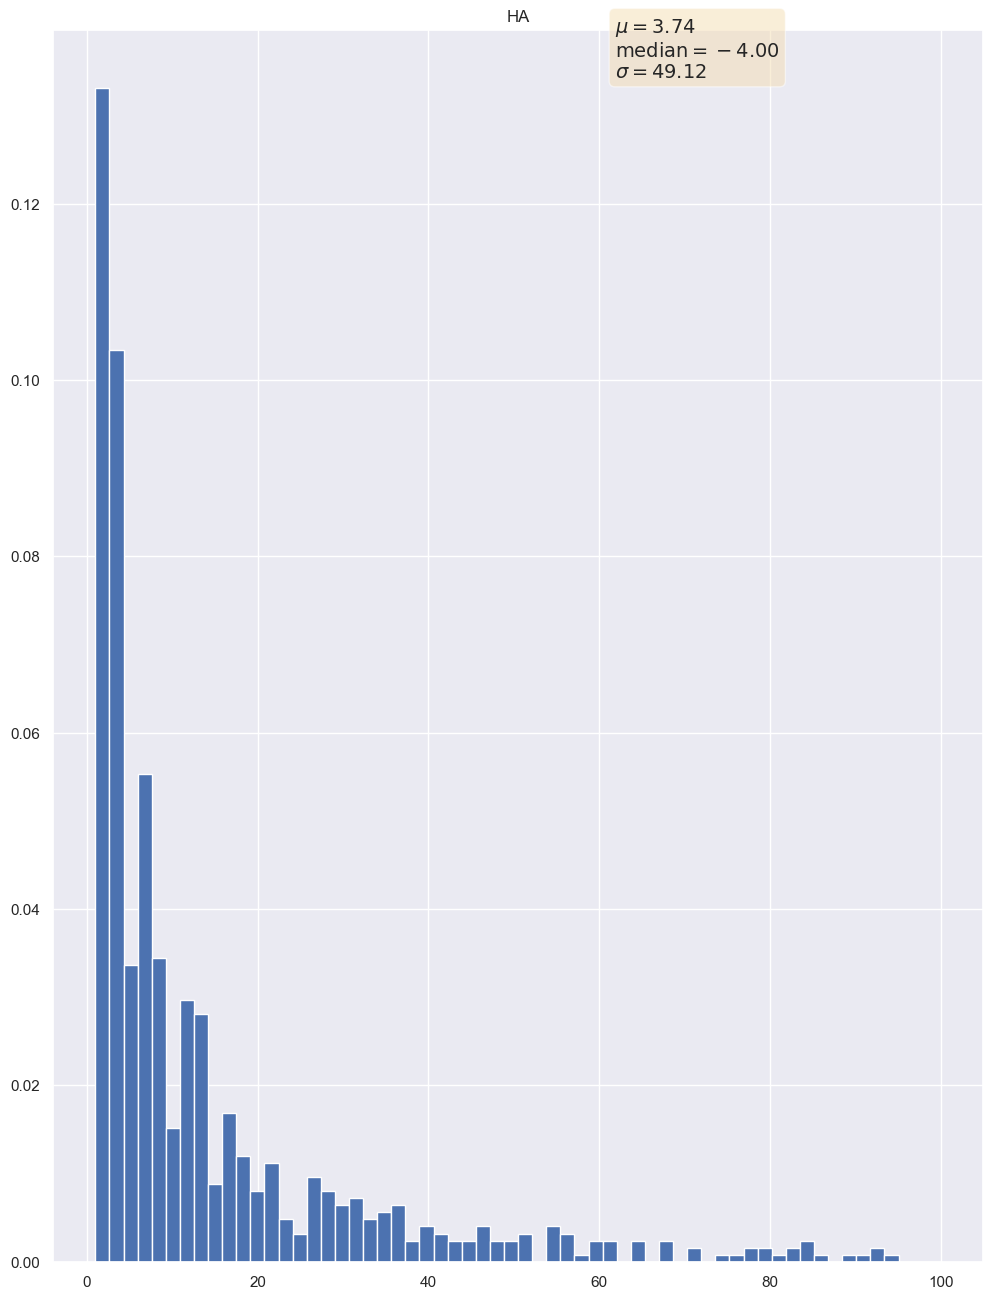

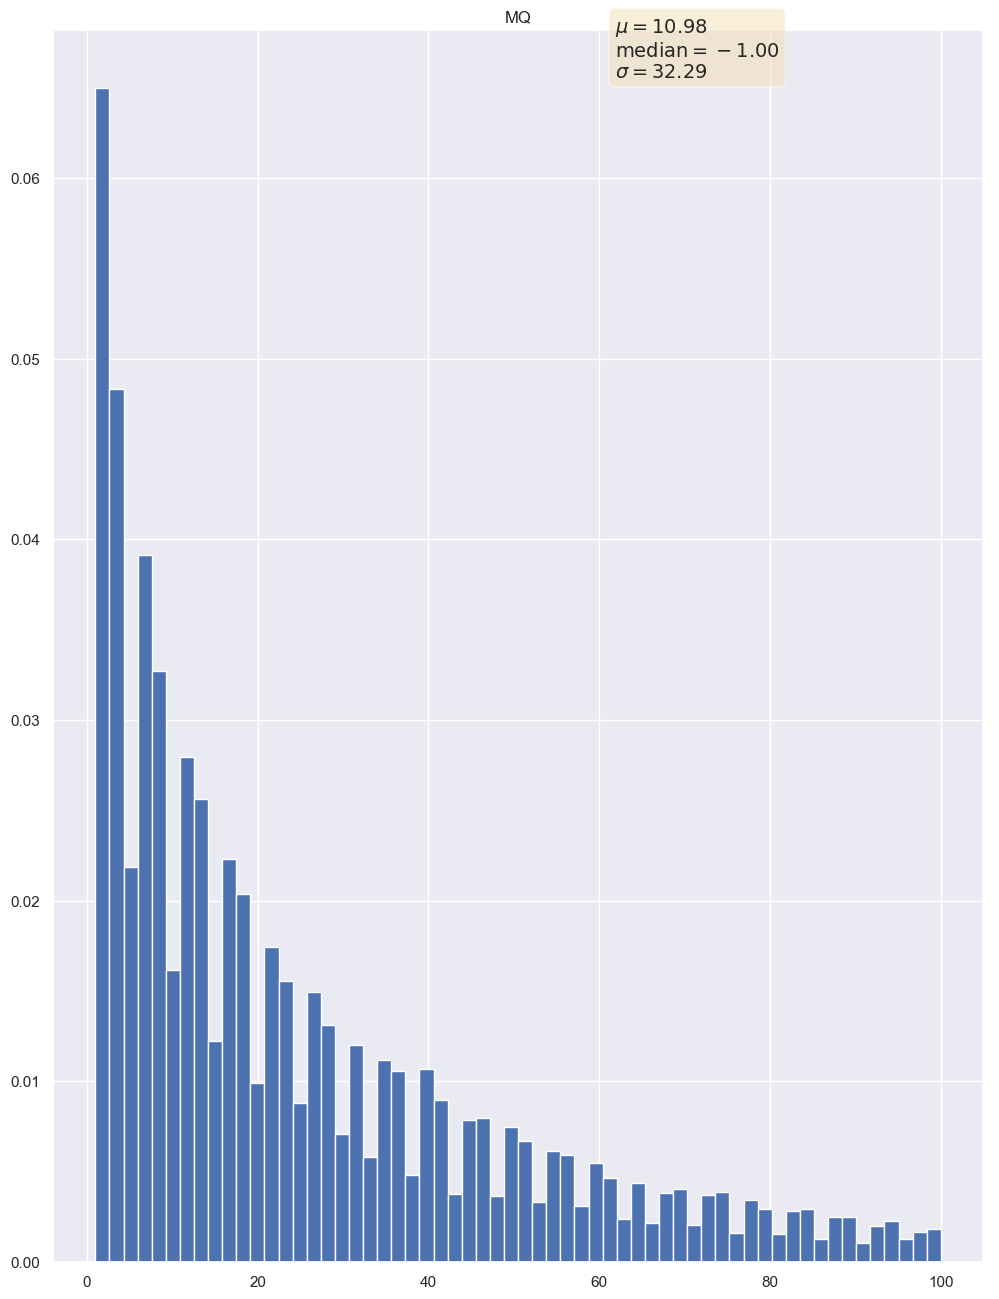

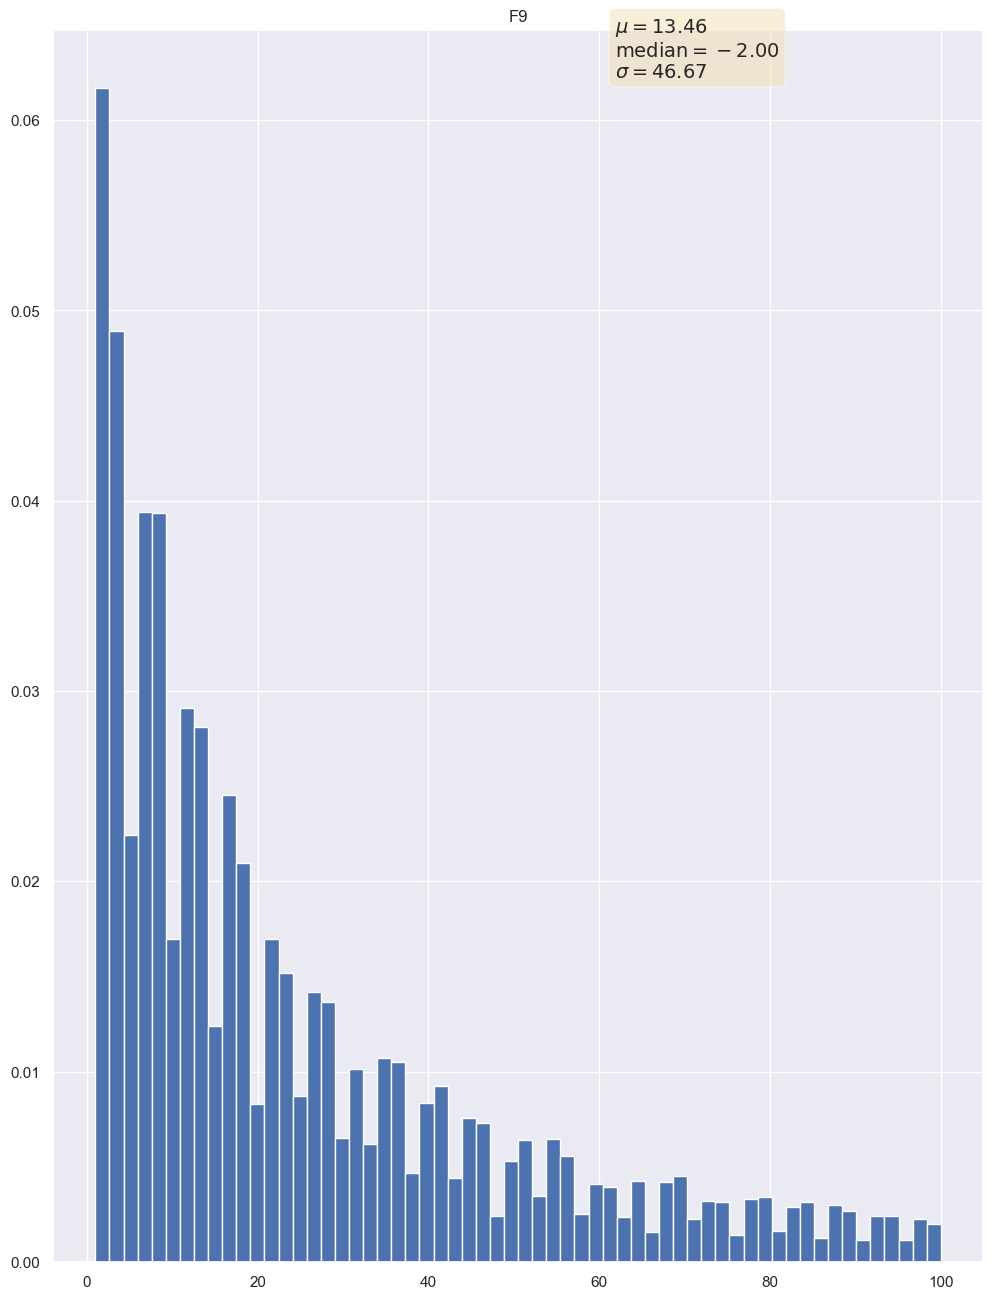

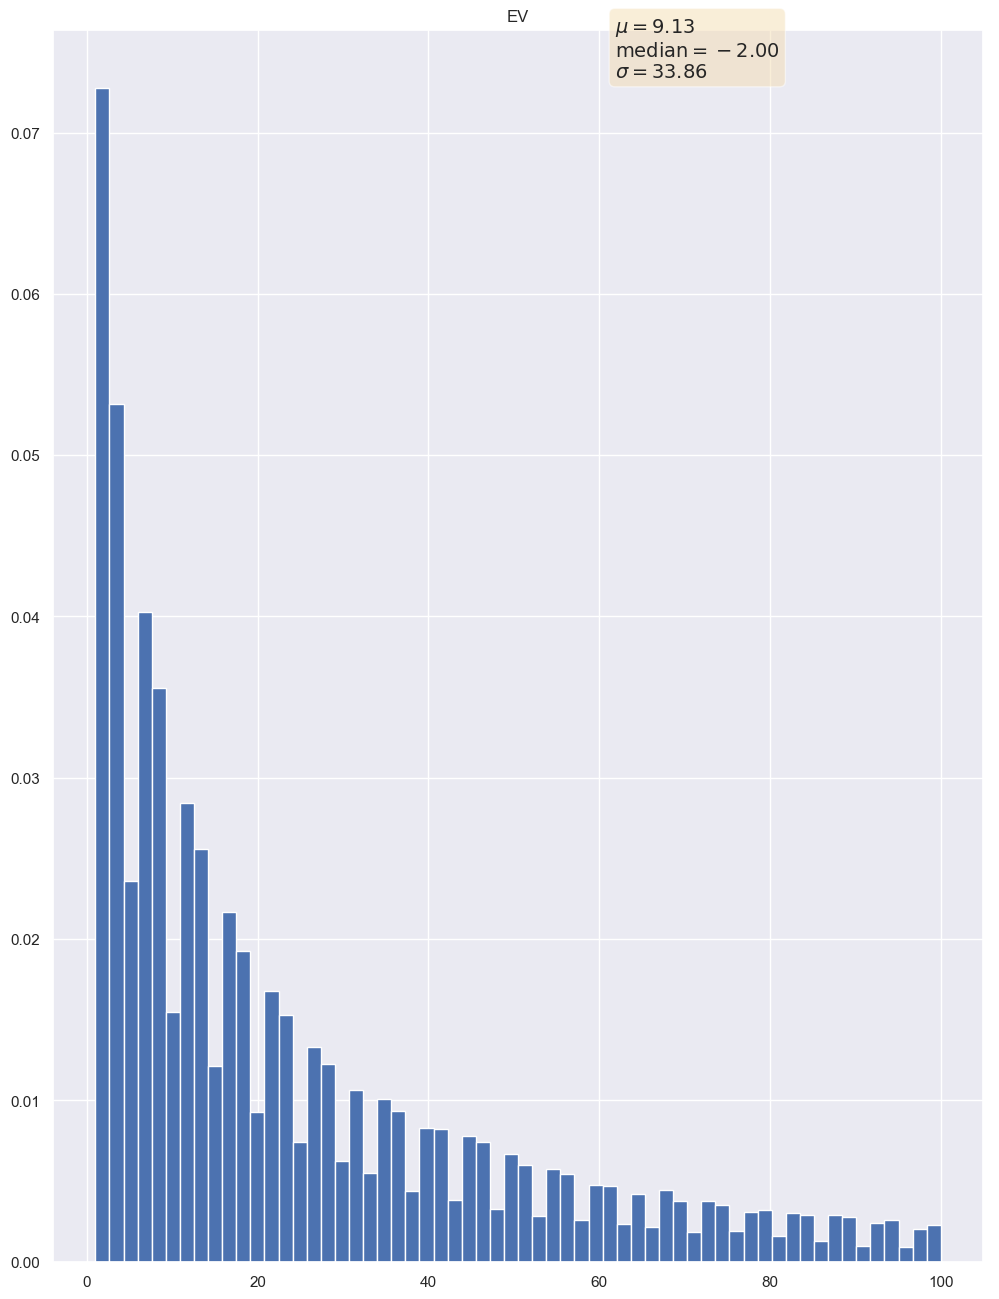

In [41]:
alist = flight['AIRLINE'].unique().tolist()

for i in range(len(alist)):
    plt.tight_layout()
    #plt.subplot(7,2,i+1)
    x = flight[flight['AIRLINE']==alist[i]]['departure_delay']
    mu = x.mean()
    median = x.median()
    sigma = x.std()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))

    plt.hist(x = flight[flight['AIRLINE'] == alist[i]]['departure_delay'], range = (1,100), normed=True, bins= 60)
    plt.title(alist[i])

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    plt.text(0.5, 0.90, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='left', bbox=props)
    plt.show()


In [42]:
flight['DEPARTURE'] = pd.to_datetime(flight['DEPARTURE'])

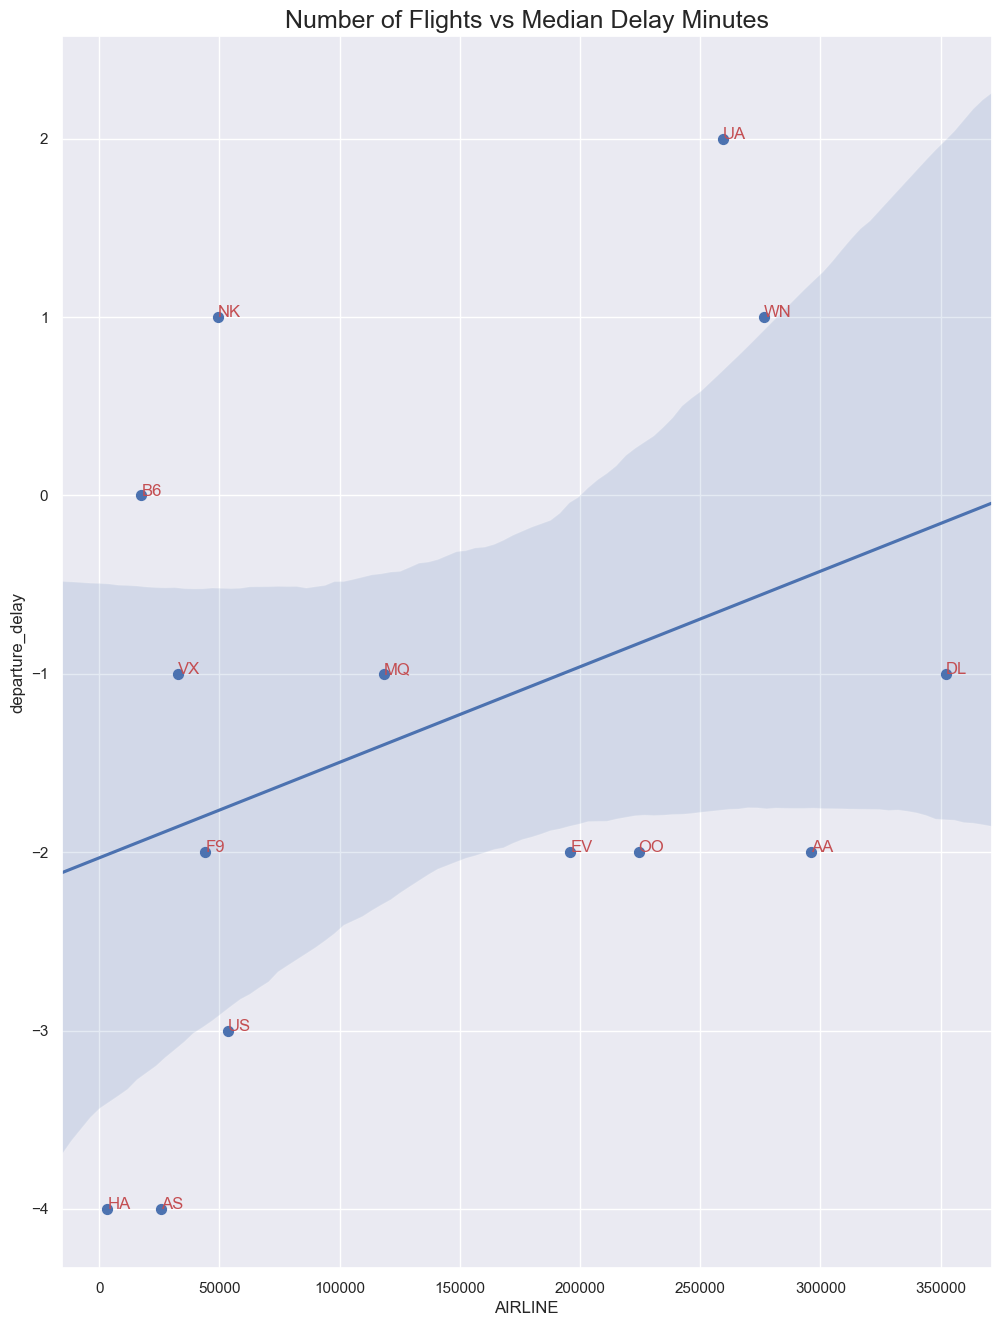

In [43]:
alist = flight['AIRLINE'].unique().tolist()

x = [] #number of flights for each airlines
y = [] #median of delays for each airlines

for i in range(len(alist)):
    
    x.append(flight['AIRLINE'][flight['AIRLINE'] == alist[i]].count())
    y.append(flight['departure_delay'][flight['AIRLINE'] == alist[i]].median())

sns.regplot(x, y, x_estimator=np.mean) 
plt.xlabel('AIRLINE')
plt.ylabel('departure_delay')

for i in range(14):
    
    plt.text(x[i], y[i], alist[i], color='r')
    
plt.title('Number of Flights vs Median Delay Minutes',size=18)
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


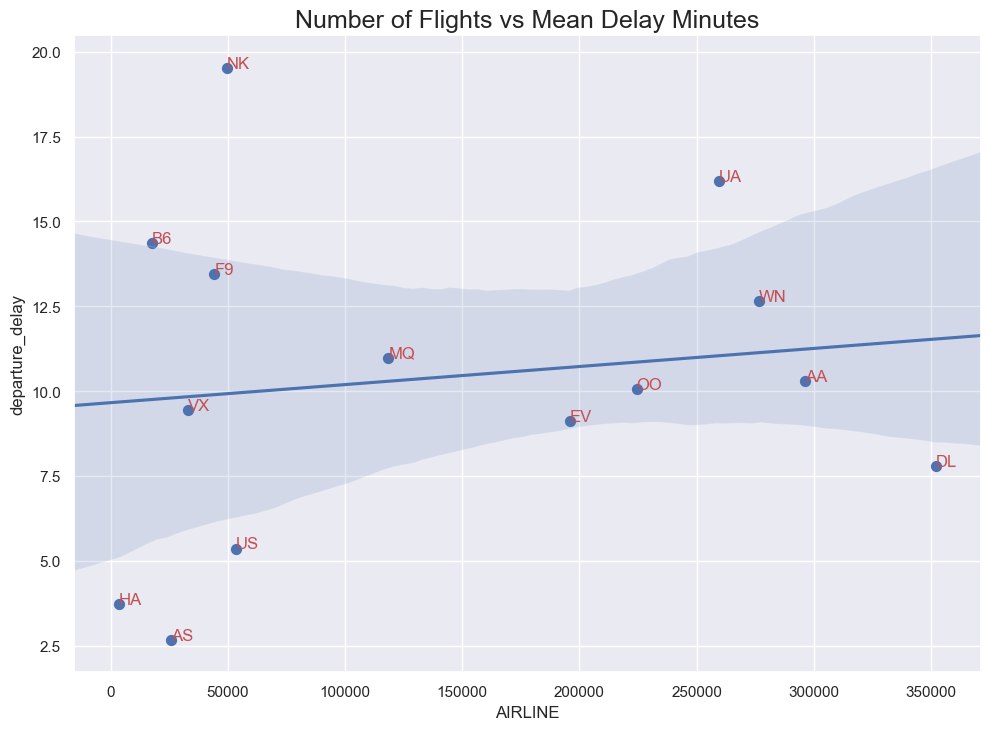

In [59]:
alist=flight['AIRLINE'].unique().tolist()
plt.cl
x=[] #number of flights for each airlines
y_mean =[] #mean of delays (min) for each airlines

for i in range(len(alist)):
    x.append(flight['AIRLINE'][flight['AIRLINE']==alist[i]].count())
    y_mean.append(flight['departure_delay'][flight['AIRLINE']==alist[i]].mean())
ax=sns.regplot(x,y_mean, x_estimator=np.mean) 
print(ax)
plt.xlabel('AIRLINE')
plt.ylabel('departure_delay')
for i in range(14):
    plt.text(x[i],y_mean[i],alist[i],color='r')
plt.title('Number of Flights vs Mean Delay Minutes',size=18)
plt.show()

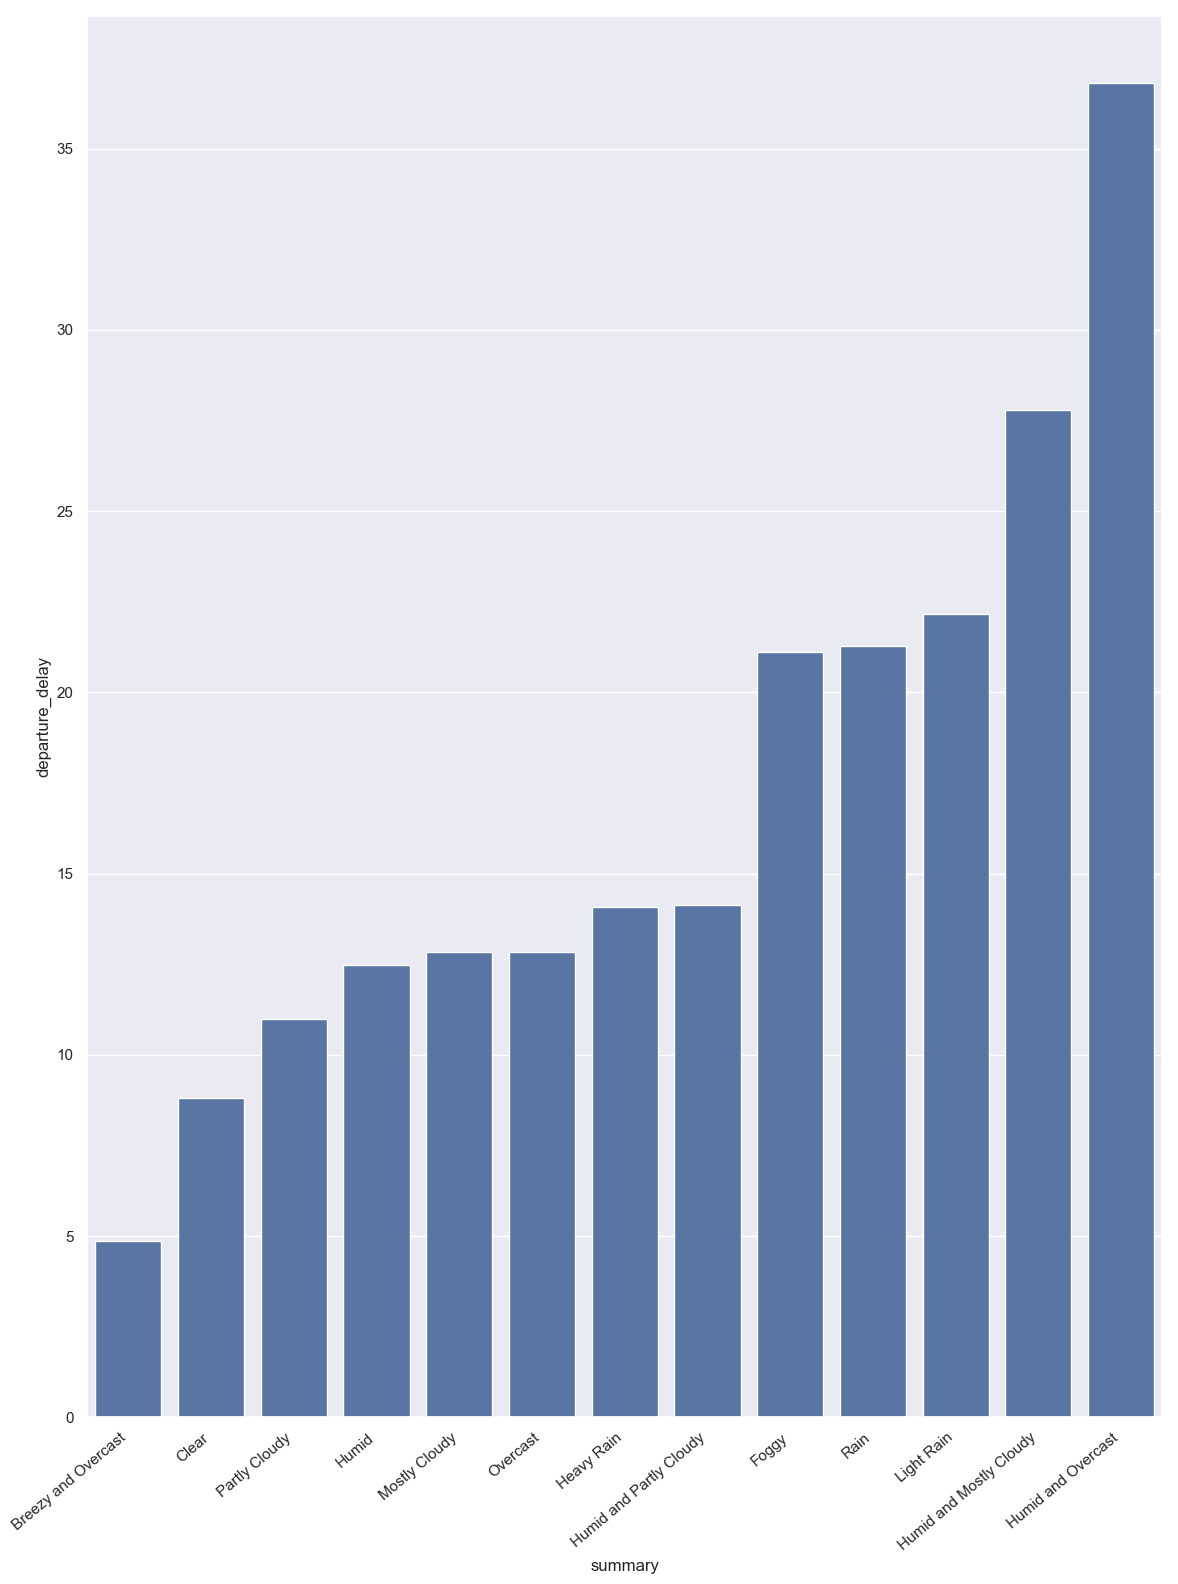

In [44]:
wh = flight[['summary','departure_delay']].groupby(flight['summary']).mean().sort_values(by='departure_delay')
ax = sns.barplot(wh.index, wh['departure_delay'],color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [45]:
newdf = flight[['ORIGIN_AIRPORT','AIRLINE','departure_delay','summary']]

ap_dict={}

airport_list=flight['ORIGIN_AIRPORT'].unique().tolist()

for i in range(len(airport_list)):
    ap_dict[airport_list[i]] = i+1

air_dict={}

airline_list = flight['AIRLINE'].unique().tolist()

for i in range(len(airline_list)):
    air_dict[airline_list[i]] = i+1

ww_dict={}

weather_list = flight['summary'].unique().tolist()

for i in range(len(weather_list)):
    ww_dict[weather_list[i]] = i+1

newdf['ORIGIN_AIRPORT'] = newdf['ORIGIN_AIRPORT'].replace(ap_dict)
newdf['AIRLINE'] = newdf['AIRLINE'].replace(air_dict)
newdf['Wearther'] = newdf['summary'].replace(ww_dict)

corr =newdf[['ORIGIN_AIRPORT','AIRLINE','departure_delay','Wearther']].corr()

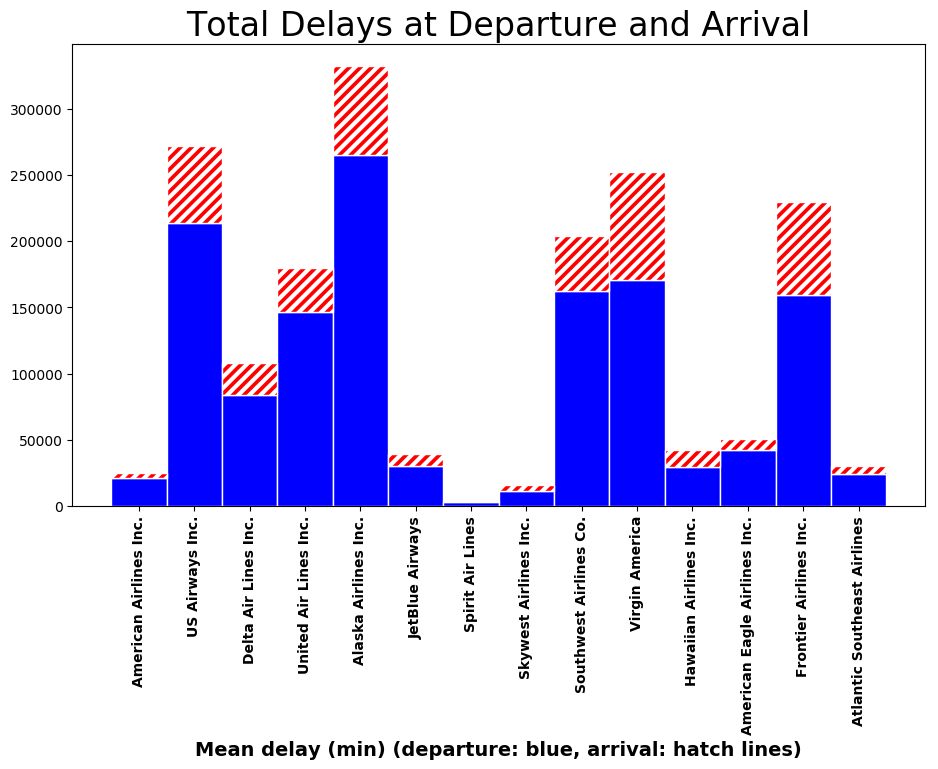

In [46]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 3.0  

fig = plt.figure(1, figsize=(11,6))

bar1=flight["departure_delay"]
bar2=flight["ARRIVAL_DELAY"]

# Heights of bars1 + bars2
#bars = np.add(bars1,bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(14)
 
# Names of group and bar width
names = flight['Airline_Names'].unique().tolist()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)

# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth, hatch = '///')

# Create green bars (top)
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.xticks(rotation=90)

    
ax.set_xticklabels(list)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Mean delay (min) (departure: blue, arrival: hatch lines)',fontsize=14, weight = 'bold');
plt.title('Total Delays at Departure and Arrival',size=24)
plt.show()

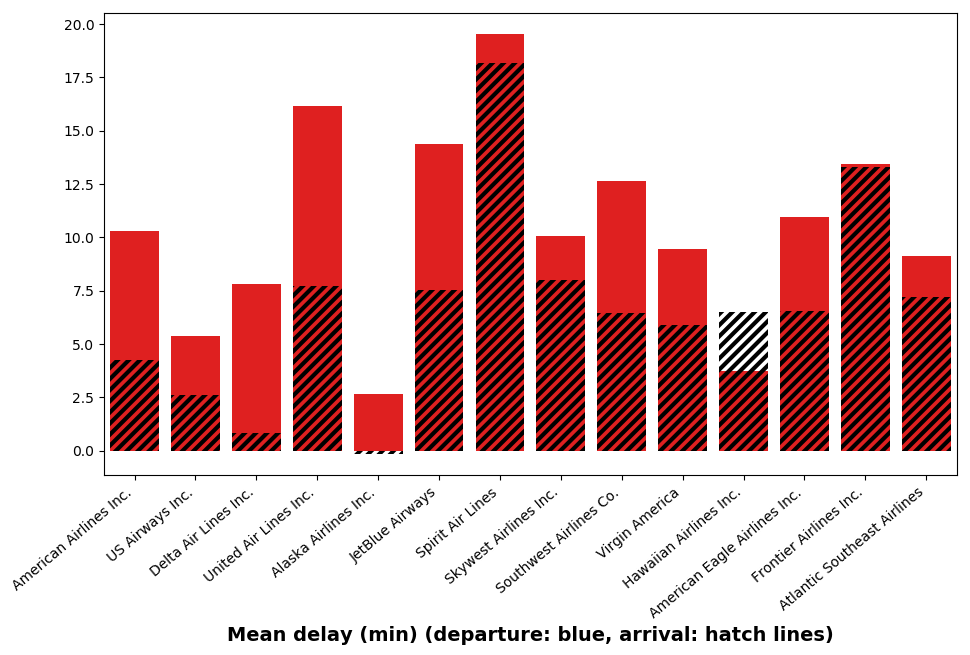

In [47]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 3.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="departure_delay", data=flight, color="red", ci=None)
ax = sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=flight, color="r", hatch = '///', alpha = 0.0, ci=None)

list=[]

for item in ax.get_xticklabels():
    
    list.append(air[item.get_text()])
    
ax.set_xticklabels(list)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel('Mean delay (min) (departure: blue, arrival: hatch lines)',fontsize=14, weight = 'bold');
plt.show()